# **Data Mining Project** 
# Task 1.2: Data Preparation
Pistolesi Veronica, Poli Francesca

### Libraries and drive mounting




In [ ]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import datetime
import sklearn

from collections import defaultdict
from scipy.stats import pearsonr
from scipy.stats import entropy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load clean_users.csv

In [ ]:
users = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/clean_users.csv', lineterminator='\n') 

In [ ]:
users

,id,name,lang,bot,created_at,statuses_count
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76
1,2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54
2,137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3
3,466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50
4,2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085
...,...,...,...,...,...,...
11503,2911861962,Madrid Lae Maika .,en,0,2019-11-29 13:16:02,1126
11504,1378532629,Clau Sato,en,0,2018-04-27 03:01:58,3024
11505,126984069,ALMA LETICIA NUÑO,es,0,2015-03-29 17:01:24,6
11506,2383025796,Minnie Guadagno,en,1,2019-03-13 02:44:13,42


In [ ]:
users=users.sort_values('id') # sort users by user_id
users= users.reset_index(drop=True) # and reset index

In [ ]:
users.rename(columns={'id': 'user_id', 'created_at': 'user_created_at'}, inplace=True)

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          11508 non-null  int64 
 1   name             11507 non-null  object
 2   lang             11508 non-null  object
 3   bot              11508 non-null  int64 
 4   user_created_at  11508 non-null  object
 5   statuses_count   11508 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 539.6+ KB


In [ ]:
users.isnull().any()

user_id            False
name                True
lang               False
bot                False
user_created_at    False
statuses_count     False
dtype: bool

### Load clean_tweets.csv

In [ ]:
tweets = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/clean_tweets.csv', lineterminator='\n')

In [ ]:
tweets

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
0,1,327746321,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
1,2,333722906,1.0,0.0,0.0,0.0,0.0,1.0,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."
2,3,2379755827,0.0,0.0,0.0,0.0,0.0,1.0,2019-05-02 13:34:31,@LOLatComedy awsome
3,4,466226882,0.0,0.0,0.0,0.0,0.0,0.0,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...
4,5,1355537995,114.0,0.0,0.0,1.0,0.0,1.0,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!
...,...,...,...,...,...,...,...,...,...,...
11278697,11712593,220933018,0.0,0.0,0.0,0.0,0.0,0.0,2018-05-04 05:29:33,ESTA MANANA AUN ESTA MUY FRIO ! MIREN ESTO ! ...
11278698,11712594,587491046,0.0,0.0,0.0,0.0,0.0,1.0,2020-04-17 02:51:53,"@warriors Congrats, maybe I'll be able to get ..."
11278699,11712595,91781300,0.0,0.0,0.0,0.0,0.0,0.0,2016-07-10 22:43:09,NaN
11278700,11712596,127895572,0.0,0.0,1.0,1.0,0.0,0.0,2019-03-07 19:56:55,Shooting crew of porn movies. #TheWorstJobToHave


In [ ]:
tweets.rename(columns={'created_at': 'tweet_created_at'}, inplace=True)

In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11278702 entries, 0 to 11278701
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                int64  
 1   user_id           int64  
 2   retweet_count     float64
 3   reply_count       float64
 4   favorite_count    float64
 5   num_hashtags      float64
 6   num_urls          float64
 7   num_mentions      float64
 8   tweet_created_at  object 
 9   text              object 
dtypes: float64(6), int64(2), object(2)
memory usage: 860.5+ MB


In [ ]:
tweets.isnull().any()

id                  False
user_id             False
retweet_count       False
reply_count         False
favorite_count      False
num_hashtags        False
num_urls            False
num_mentions        False
tweet_created_at     True
text                 True
dtype: bool

In [ ]:
tweets.user_id.isnull().sum()

0

### Merge users and tweets

Creation of the new dataset from merging the two original datasets Users and Tweets, already filtered during the data cleaning phase

In [ ]:
merge = pd.merge(users, tweets, how='inner', on = 'user_id')
merge.sort_values('user_id', inplace=True) # sort merge by user_id
merge[:20]

,user_id,name,lang,bot,user_created_at,statuses_count,id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,tweet_created_at,text
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,2412,0.0,0.0,0.0,2.0,0.0,1.0,2020-02-28 21:41:17,@r0bl0rd did you arrange this? #llamas #winamp
1579,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,7687839,2.0,0.0,0.0,0.0,0.0,0.0,2020-01-15 20:00:07,"Little tip from this JD ""this is standard"" whe..."
1580,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,7699169,0.0,0.0,1.0,0.0,0.0,1.0,2020-02-20 18:26:04,@VinodSreeharsha thanks Vinod!
1581,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,7700557,1.0,0.0,0.0,0.0,0.0,0.0,2020-02-18 02:13:23,Who was playing Kristin Wiig's mum in the Cali...
1582,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,7702891,1.0,0.0,0.0,0.0,1.0,1.0,NaN,RT @Damian_Barr: Cracking New Yorker piece on ...
1583,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,7709281,0.0,0.0,1.0,0.0,0.0,1.0,2020-02-22 08:15:05,I like @katelosse's technique of spelling W*dh...
1584,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,7710438,0.0,0.0,1.0,1.0,1.0,0.0,2020-03-09 23:54:11,Very very proud to be a Fellow at University C...
1578,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,7685025,1.0,0.0,0.0,0.0,1.0,1.0,2020-03-03 02:48:11,"RT @marikotamaki: Birthday girl, desert sweate..."
1585,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,7715326,11.0,0.0,0.0,1.0,0.0,1.0,NaN,RT @NeginFarsad: Patricia Arquette Presidentia...
1587,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,7748961,0.0,0.0,1.0,2.0,0.0,0.0,2020-01-14 02:36:43,Yeesssssssssssss Jeffrey Tambor!!! #transparen...


In [ ]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11277763 entries, 0 to 11277762
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           int64  
 1   name              object 
 2   lang              object 
 3   bot               int64  
 4   user_created_at   object 
 5   statuses_count    int64  
 6   id                int64  
 7   retweet_count     float64
 8   reply_count       float64
 9   favorite_count    float64
 10  num_hashtags      float64
 11  num_urls          float64
 12  num_mentions      float64
 13  tweet_created_at  object 
 14  text              object 
dtypes: float64(6), int64(4), object(5)
memory usage: 1.3+ GB


In [ ]:
# Change type for date
merge['user_created_at'] = pd.to_datetime(merge.user_created_at, format='%Y-%m-%d %H:%M:%S')
merge['tweet_created_at'] = pd.to_datetime(merge.tweet_created_at, format='%Y-%m-%d %H:%M:%S')

In [ ]:
merge.isnull().any() 

user_id             False
name                 True
lang                False
bot                 False
user_created_at     False
statuses_count      False
id                  False
retweet_count       False
reply_count         False
favorite_count      False
num_hashtags        False
num_urls            False
num_mentions        False
tweet_created_at     True
text                 True
dtype: bool

**Observation:** same NaN values as the original datasets Users and Tweets, except for *user_id* (in Users there were none).

## Indicators

In this section there are: 
* statistics about the original data features (indicators) to be found in the merge dataset
* creation of new features informative about the profiling of the users based on the tweets

The statistics contain an analysis of the distirbution and the outliers of every single attribute, but we do not delete the outliers in this case.

### Basic Indicators

Here we filter and analyze the original features of the dataset one by one.

In [ ]:
merge.groupby('user_id').sum()[['retweet_count', 'reply_count',	'favorite_count',	'num_hashtags',	'num_urls',	'num_mentions']]

,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
user_id,,,,,,
678033,187157.0,0.0,1201.0,868.0,793.0,2643.0
722623,1158520.0,0.0,969.0,766.0,345.0,1357.0
755116,92396.0,0.0,391.0,77.0,318.0,2113.0
755746,317861.0,0.0,209.0,488.0,848.0,1475.0
785080,138486.0,0.0,1714.0,185.0,234.0,2662.0
...,...,...,...,...,...,...
3156622237,7.0,0.0,85.0,372.0,1006.0,821.0
3158349782,8860.0,0.0,161.0,21.0,1.0,77.0
3159993463,2458.0,0.0,9.0,22.0,47.0,34.0


In [ ]:
users['retweet_count']=list(merge.groupby(['user_id']).sum()['retweet_count'])
users['reply_count']=list(merge.groupby(['user_id']).sum()['reply_count'])
users['favorite_count']=list(merge.groupby(['user_id']).sum()['favorite_count'])
users['num_hashtags']=list(merge.groupby(['user_id']).sum()['num_hashtags'])
users['num_urls']=list(merge.groupby(['user_id']).sum()['num_urls'])
users['num_mentions']=list(merge.groupby(['user_id']).sum()['num_mentions'])
users

,user_id,name,lang,bot,user_created_at,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,187157.0,0.0,1201.0,868.0,793.0,2643.0
1,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,11770,1158520.0,0.0,969.0,766.0,345.0,1357.0
2,755116,呉⚛,en,0,2012-02-08 05:25:49,39158,92396.0,0.0,391.0,77.0,318.0,2113.0
3,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,18035,317861.0,0.0,209.0,488.0,848.0,1475.0
4,785080,W H,en,0,2012-02-23 01:08:16,22496,138486.0,0.0,1714.0,185.0,234.0,2662.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11503,3156622237,RoboDerp,en,0,2020-04-15 15:17:36,19061,7.0,0.0,85.0,372.0,1006.0,821.0
11504,3158349782,OSU Ladder,en,0,2020-04-17 00:45:01,96,8860.0,0.0,161.0,21.0,1.0,77.0
11505,3159993463,martin lee,en,0,2020-04-17 16:09:47,107,2458.0,0.0,9.0,22.0,47.0,34.0
11506,3161171948,丸董,zh-tw,0,2020-04-18 14:08:13,6,0.0,0.0,1.0,0.0,1.0,2.0


#### retweet_count statistics

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.retweet_count.describe() 

count      11508.00
mean      502841.08
std      2978290.92
min            0.00
25%            3.00
50%           40.00
75%        55527.25
max     99360670.00
Name: retweet_count, dtype: float64

In [ ]:
# Check the number of outliers
Q1, Q3= users.retweet_count.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in users.retweet_count:
  if x > max or x < min: 
    outliers = outliers+1

percentage = round((outliers*100)/users.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 2452
Percentage of outliers 21.31 %


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.retweet_count.describe() 

count      11508.00
mean      502841.08
std      2978290.92
min            0.00
25%            3.00
50%           40.00
75%        55527.25
max     99360670.00
Name: retweet_count, dtype: float64

In [ ]:
median= np.nanmedian(users.retweet_count)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(users.retweet_count, nan_policy='omit'),2))
mode= stats.mode(users.retweet_count, nan_policy='omit')[0][0]
print("Mode:", mode)

Median: 40.0
MAD: 40.0
Mode: 0.0


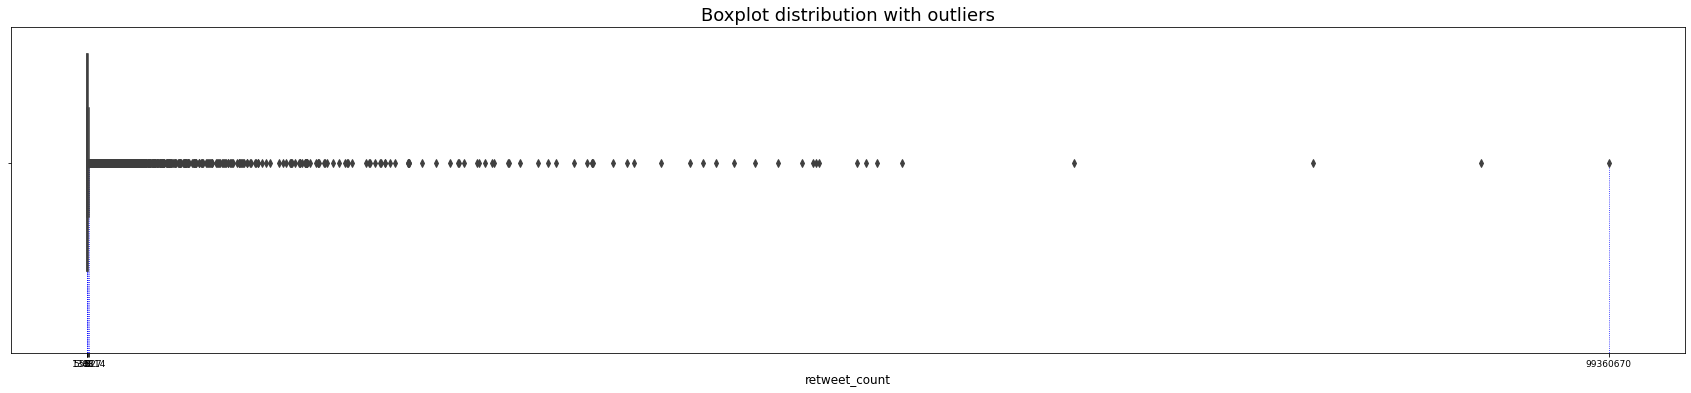

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='retweet_count', data=users)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(users.retweet_count, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("retweet_count", rotation = "horizontal", size = 12)
plt.show()

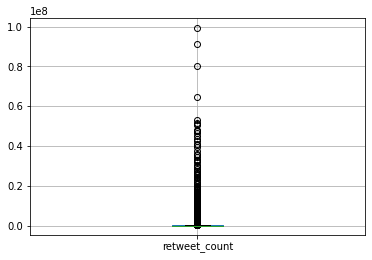

In [ ]:
users.boxplot(column=['retweet_count']) 

#### reply_count statistics

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.reply_count.describe() 

count   11508.00
mean      166.54
std      1143.12
min         0.00
25%         0.00
50%         0.00
75%         0.00
max     20001.00
Name: reply_count, dtype: float64

In [ ]:
# Check the number of outliers
Q1, Q3= users.reply_count.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in users.reply_count:
  if x > max or x < min: 
    outliers = outliers+1

percentage = round((outliers*100)/users.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 2386
Percentage of outliers 20.73 %


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.reply_count.describe() 

count   11508.00
mean      166.54
std      1143.12
min         0.00
25%         0.00
50%         0.00
75%         0.00
max     20001.00
Name: reply_count, dtype: float64

In [ ]:
median= np.nanmedian(users.reply_count)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(users.reply_count, nan_policy='omit'),2))
mode= stats.mode(users.reply_count, nan_policy='omit')[0][0]
print("Mode:", mode)

Median: 0.0
MAD: 0.0
Mode: 0.0


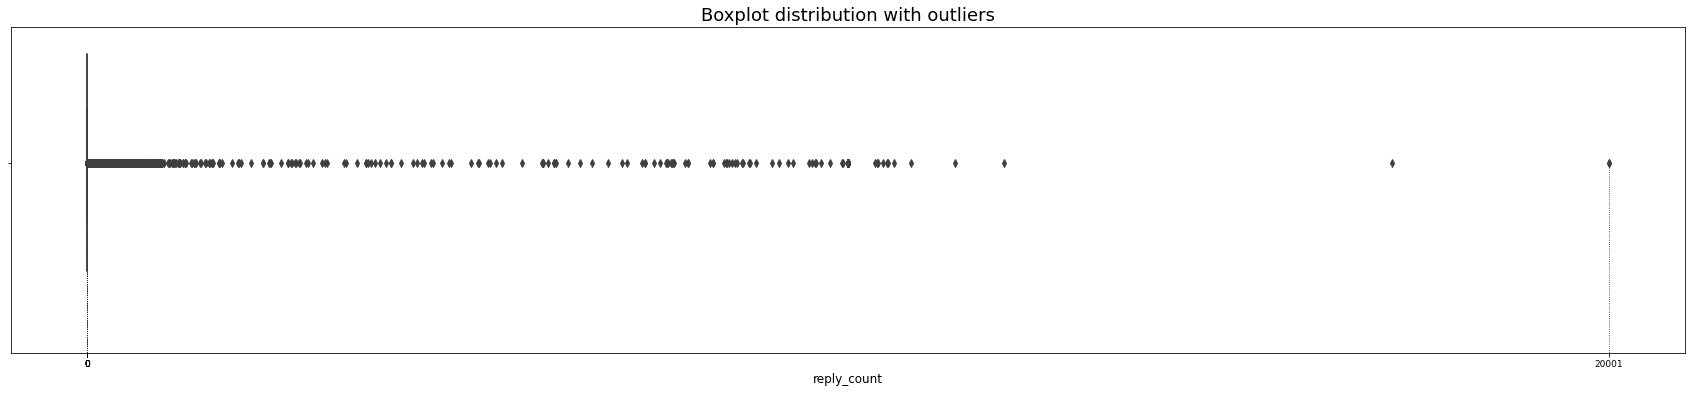

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='reply_count', data=users)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(users.reply_count, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("reply_count", rotation = "horizontal", size = 12)
plt.show()

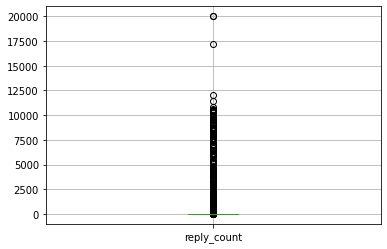

In [ ]:
users.boxplot(column=['reply_count']) 

#### favorite_count statistics

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.favorite_count.describe() 

count    11508.00
mean      1276.70
std      20080.23
min          0.00
25%          3.00
50%         10.00
75%        414.25
max     822127.00
Name: favorite_count, dtype: float64

In [ ]:
# Check the number of outliers
Q1, Q3= users.favorite_count.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in users.favorite_count:
  if x > max or x < min: 
    outliers = outliers+1

percentage = round((outliers*100)/users.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 1667
Percentage of outliers 14.49 %


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.favorite_count.describe() 

count    11508.00
mean      1276.70
std      20080.23
min          0.00
25%          3.00
50%         10.00
75%        414.25
max     822127.00
Name: favorite_count, dtype: float64

In [ ]:
median= np.nanmedian(users.favorite_count)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(users.favorite_count, nan_policy='omit'),2))
mode= stats.mode(users.favorite_count, nan_policy='omit')[0][0]
print("Mode:", mode)

Median: 10.0
MAD: 10.0
Mode: 0.0


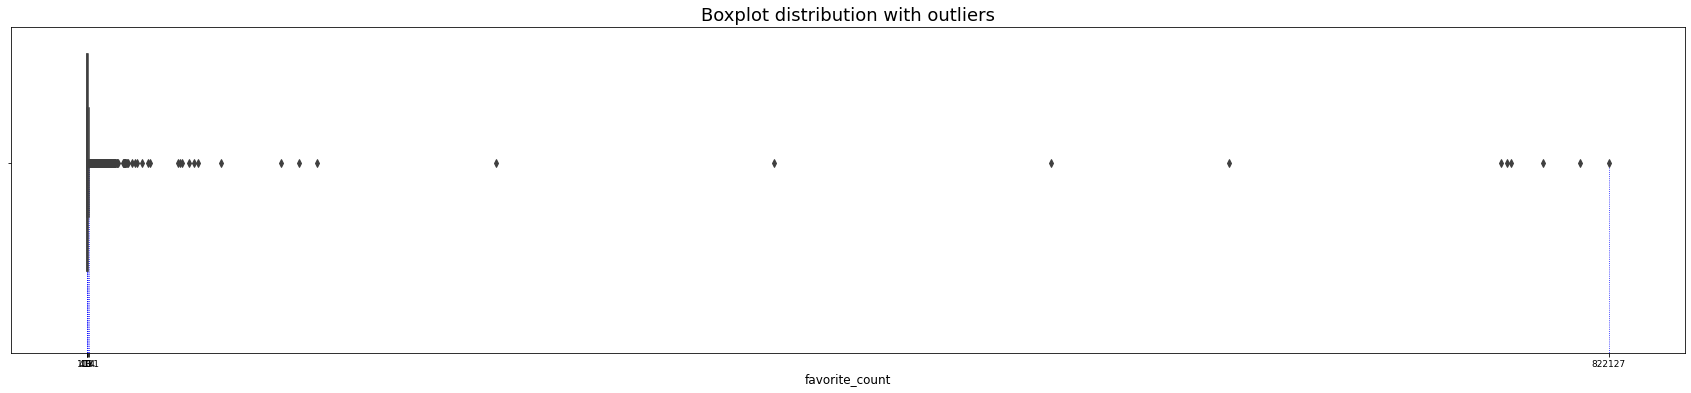

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='favorite_count', data=users)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(users.favorite_count, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("favorite_count", rotation = "horizontal", size = 12)
plt.show()

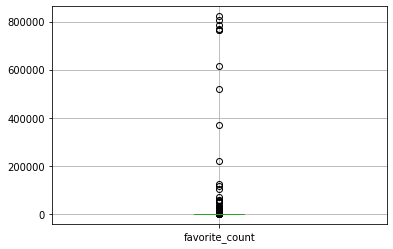

In [ ]:
users.boxplot(column=['favorite_count']) 

#### num_hashtags statistics

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.num_hashtags.describe() 

count   11508.00
mean      178.67
std       496.48
min         0.00
25%         5.00
50%        11.00
75%       122.00
max     16228.00
Name: num_hashtags, dtype: float64

In [ ]:
# Check the number of outliers
Q1, Q3= users.num_hashtags.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in users.num_hashtags:
  if x > max or x < min: 
    outliers = outliers+1

percentage = round((outliers*100)/users.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 1683
Percentage of outliers 14.62 %


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.num_hashtags.describe() 

count   11508.00
mean      178.67
std       496.48
min         0.00
25%         5.00
50%        11.00
75%       122.00
max     16228.00
Name: num_hashtags, dtype: float64

In [ ]:
median= np.nanmedian(users.num_hashtags)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(users.num_hashtags, nan_policy='omit'),2))
mode= stats.mode(users.num_hashtags, nan_policy='omit')[0][0]
print("Mode:", mode)

Median: 11.0
MAD: 10.0
Mode: 0.0


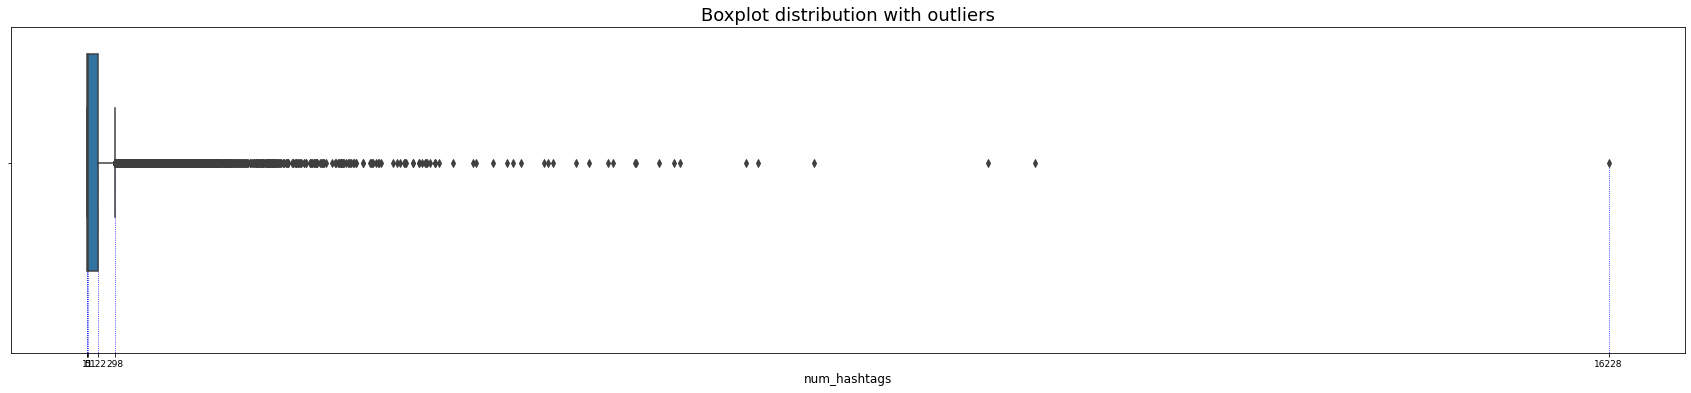

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='num_hashtags', data=users)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(users.num_hashtags, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("num_hashtags", rotation = "horizontal", size = 12)
plt.show()

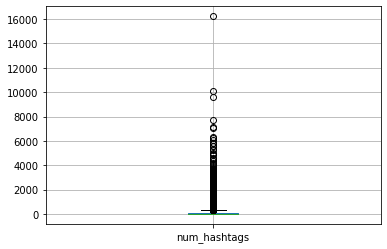

In [ ]:
users.boxplot(column=['num_hashtags']) 

#### num_urls statistics

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.num_urls.describe() 

count   11508.00
mean      182.65
std       455.01
min         0.00
25%         0.00
50%         2.00
75%        98.00
max      4335.00
Name: num_urls, dtype: float64

In [ ]:
# Check the number of outliers
Q1, Q3= users.num_urls.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in users.num_urls:
  if x > max or x < min: 
    outliers = outliers+1

percentage = round((outliers*100)/users.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 1888
Percentage of outliers 16.41 %


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.num_urls.describe() 

count   11508.00
mean      182.65
std       455.01
min         0.00
25%         0.00
50%         2.00
75%        98.00
max      4335.00
Name: num_urls, dtype: float64

In [ ]:
median= np.nanmedian(users.num_urls)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(users.num_urls, nan_policy='omit'),2))
mode= stats.mode(users.num_urls, nan_policy='omit')[0][0]
print("Mode:", mode)

Median: 2.0
MAD: 2.0
Mode: 0.0


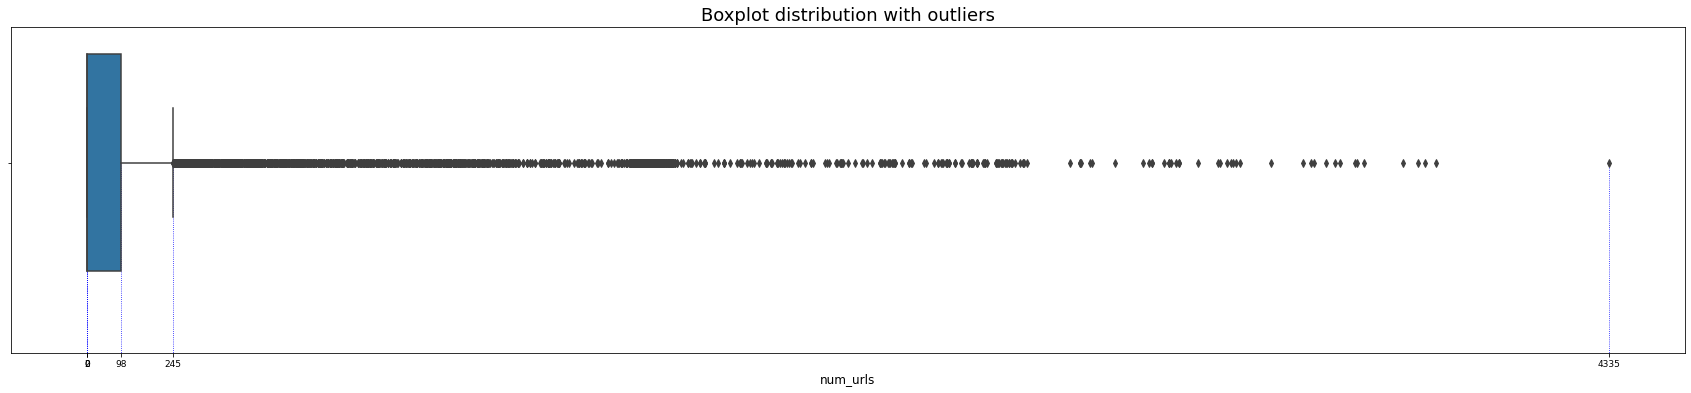

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='num_urls', data=users)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(users.num_urls, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("num_urls", rotation = "horizontal", size = 12)
plt.show()

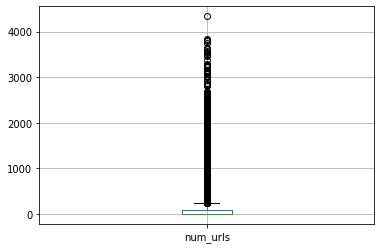

In [ ]:
users.boxplot(column=['num_urls']) 

#### num_mentions statistics

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.num_mentions.describe() 

count   11508.00
mean      505.97
std      1012.75
min         0.00
25%         2.00
50%        37.00
75%       514.25
max     13664.00
Name: num_mentions, dtype: float64

In [ ]:
# Check the number of outliers
Q1, Q3= users.num_mentions.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in users.num_mentions:
  if x > max or x < min: 
    outliers = outliers+1

percentage = round((outliers*100)/users.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 1793
Percentage of outliers 15.58 %


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.num_mentions.describe() 

count   11508.00
mean      505.97
std      1012.75
min         0.00
25%         2.00
50%        37.00
75%       514.25
max     13664.00
Name: num_mentions, dtype: float64

In [ ]:
median= np.nanmedian(users.num_mentions)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(users.num_mentions, nan_policy='omit'),2))
mode= stats.mode(users.num_mentions, nan_policy='omit')[0][0]
print("Mode:", mode)

Median: 37.0
MAD: 36.0
Mode: 0.0


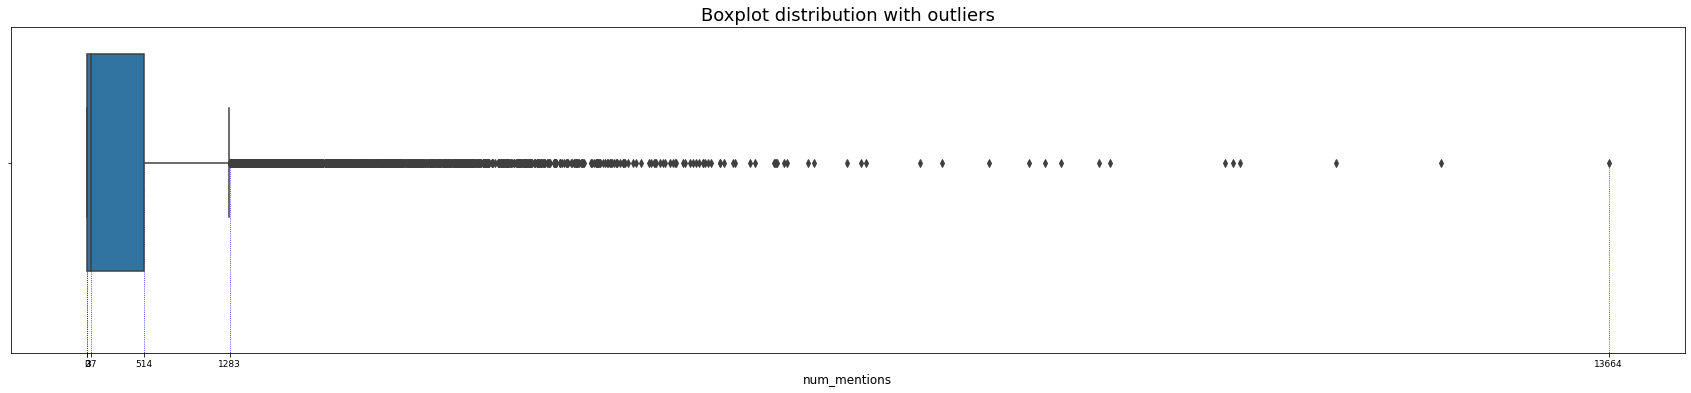

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='num_mentions', data=users)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(users.num_mentions, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("num_mentions", rotation = "horizontal", size = 12)
plt.show()

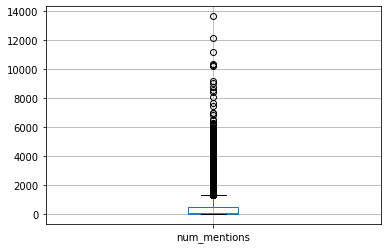

In [ ]:
users.boxplot(column=['num_mentions']) 

### Max and Standard Deviation of retweet_count and favorite_count

In [ ]:
users['max_retweet_count']=list(merge.groupby(['user_id']).max()['retweet_count'])
users['max_favorite_count']=list(merge.groupby(['user_id']).max()['favorite_count'])
users

<ipython-input-57-42c9997cb34f>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  users['max_retweet_count']=list(merge.groupby(['user_id']).max()['retweet_count'])
<ipython-input-57-42c9997cb34f>:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  users['max_favorite_count']=list(merge.groupby(['user_id']).max()['favorite_count'])


,user_id,name,lang,bot,user_created_at,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,187157.00,0.00,1201.00,868.00,793.00,2643.00,21325.00,34.00
1,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,11770,1158520.00,0.00,969.00,766.00,345.00,1357.00,296689.00,19.00
2,755116,呉⚛,en,0,2012-02-08 05:25:49,39158,92396.00,0.00,391.00,77.00,318.00,2113.00,13121.00,8.00
3,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,18035,317861.00,0.00,209.00,488.00,848.00,1475.00,105138.00,7.00
4,785080,W H,en,0,2012-02-23 01:08:16,22496,138486.00,0.00,1714.00,185.00,234.00,2662.00,16181.00,32.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11503,3156622237,RoboDerp,en,0,2020-04-15 15:17:36,19061,7.00,0.00,85.00,372.00,1006.00,821.00,1.00,3.00
11504,3158349782,OSU Ladder,en,0,2020-04-17 00:45:01,96,8860.00,0.00,161.00,21.00,1.00,77.00,6181.00,18.00
11505,3159993463,martin lee,en,0,2020-04-17 16:09:47,107,2458.00,0.00,9.00,22.00,47.00,34.00,976.00,1.00
11506,3161171948,丸董,zh-tw,0,2020-04-18 14:08:13,6,0.00,0.00,1.00,0.00,1.00,2.00,0.00,1.00


In [ ]:
users['std_retweet_count']=list(merge.groupby(['user_id']).std(ddof=0)['retweet_count'])
users['std_favorite_count']=list(merge.groupby(['user_id']).std(ddof=0)['favorite_count'])
users

,user_id,name,lang,bot,user_created_at,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,187157.00,0.00,1201.00,868.00,793.00,2643.00,21325.00,34.00,723.52,1.42
1,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,11770,1158520.00,0.00,969.00,766.00,345.00,1357.00,296689.00,19.00,11508.21,1.08
2,755116,呉⚛,en,0,2012-02-08 05:25:49,39158,92396.00,0.00,391.00,77.00,318.00,2113.00,13121.00,8.00,546.63,0.49
3,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,18035,317861.00,0.00,209.00,488.00,848.00,1475.00,105138.00,7.00,3359.36,0.39
4,785080,W H,en,0,2012-02-23 01:08:16,22496,138486.00,0.00,1714.00,185.00,234.00,2662.00,16181.00,32.00,462.74,1.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11503,3156622237,RoboDerp,en,0,2020-04-15 15:17:36,19061,7.00,0.00,85.00,372.00,1006.00,821.00,1.00,3.00,0.04,0.15
11504,3158349782,OSU Ladder,en,0,2020-04-17 00:45:01,96,8860.00,0.00,161.00,21.00,1.00,77.00,6181.00,18.00,611.72,2.67
11505,3159993463,martin lee,en,0,2020-04-17 16:09:47,107,2458.00,0.00,9.00,22.00,47.00,34.00,976.00,1.00,103.17,0.26
11506,3161171948,丸董,zh-tw,0,2020-04-18 14:08:13,6,0.00,0.00,1.00,0.00,1.00,2.00,0.00,1.00,0.00,0.37


#### max_retweet_count

Statistics section to analyze the attribute and its outliers.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.max_retweet_count.describe() 

count    11508.00
mean     36891.86
std      98009.69
min          0.00
25%          1.00
50%          7.00
75%      11447.25
max     500000.00
Name: max_retweet_count, dtype: float64

In [ ]:
# Check the number of outliers
Q1, Q3= users.max_retweet_count.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in users.max_retweet_count:
  if x > max or x < min: 
    outliers = outliers+1

percentage = round((outliers*100)/users.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 2374
Percentage of outliers 20.63 %


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.max_retweet_count.describe() 

count    11508.00
mean     36891.86
std      98009.69
min          0.00
25%          1.00
50%          7.00
75%      11447.25
max     500000.00
Name: max_retweet_count, dtype: float64

In [ ]:
median= np.nanmedian(users.max_retweet_count)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(users.max_retweet_count, nan_policy='omit'),2))
mode= stats.mode(users.max_retweet_count, nan_policy='omit')[0][0]
print("Mode:", mode)

Median: 7.0
MAD: 7.0
Mode: 1.0


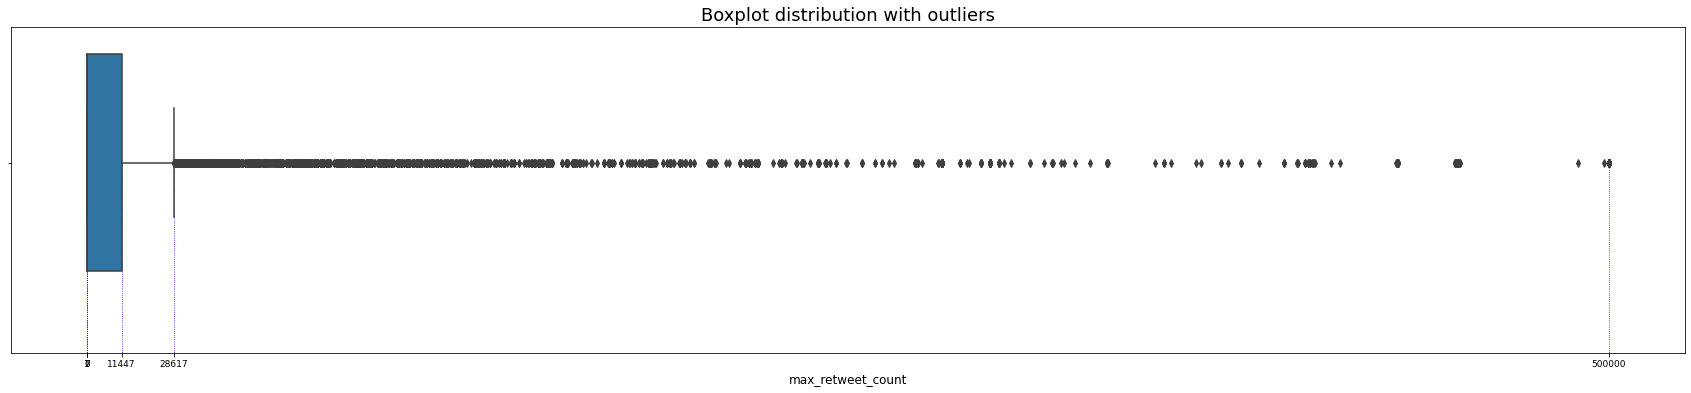

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='max_retweet_count', data=users)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(users.max_retweet_count, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("max_retweet_count", rotation = "horizontal", size = 12)
plt.show()

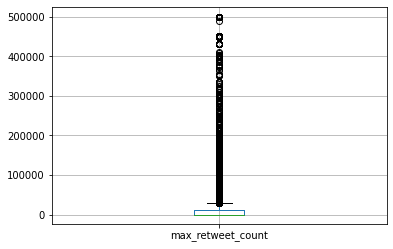

In [ ]:
users.boxplot(column=['max_retweet_count']) 

#### max_favorite_count

Statistics section to analyze the attribute and its outliers.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.max_favorite_count.describe() 

count   11508.00
mean      217.87
std      1234.96
min         0.00
25%         1.00
50%         2.00
75%        12.00
max     10000.00
Name: max_favorite_count, dtype: float64

In [ ]:
# Check the number of outliers
Q1, Q3= users.max_favorite_count.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in users.max_favorite_count:
  if x > max or x < min: 
    outliers = outliers+1

percentage = round((outliers*100)/users.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 1846
Percentage of outliers 16.04 %


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.max_favorite_count.describe() 

count   11508.00
mean      217.87
std      1234.96
min         0.00
25%         1.00
50%         2.00
75%        12.00
max     10000.00
Name: max_favorite_count, dtype: float64

In [ ]:
median= np.nanmedian(users.max_favorite_count)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(users.max_favorite_count, nan_policy='omit'),2))
mode= stats.mode(users.max_favorite_count, nan_policy='omit')[0][0]
print("Mode:", mode)

Median: 2.0
MAD: 2.0
Mode: 1.0


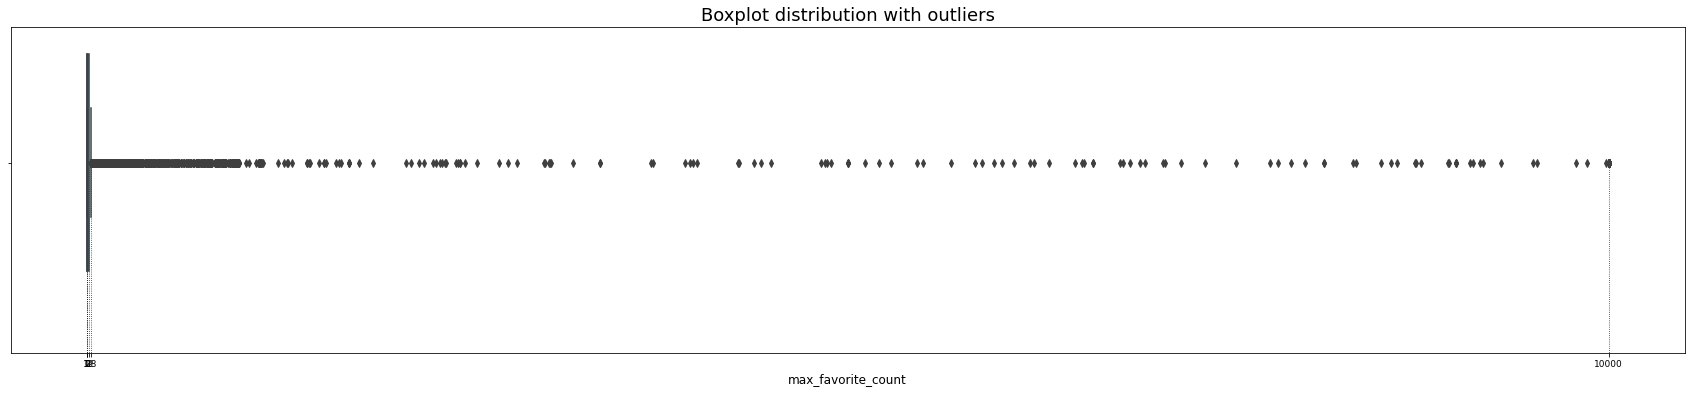

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='max_favorite_count', data=users)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(users.max_favorite_count, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("max_favorite_count", rotation = "horizontal", size = 12)
plt.show()

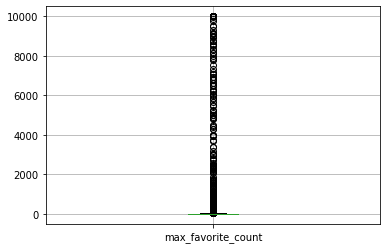

In [ ]:
users.boxplot(column=['max_favorite_count']) 

#### std_retweet_count

In [ ]:
users.std_retweet_count.isnull().sum()

0

Statistics section to analyze the attribute and its outliers.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.std_retweet_count.describe() 

count    11508.00
mean      1710.42
std       5439.13
min          0.00
25%          0.15
50%          0.66
75%        957.77
max     106034.98
Name: std_retweet_count, dtype: float64

In [ ]:
# Check the number of outliers
Q1, Q3= users.std_retweet_count.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in users.std_retweet_count:
  if x > max or x < min: 
    outliers = outliers+1

percentage = round((outliers*100)/users.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 1806
Percentage of outliers 15.69 %


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.std_retweet_count.describe() 

count    11508.00
mean      1710.42
std       5439.13
min          0.00
25%          0.15
50%          0.66
75%        957.77
max     106034.98
Name: std_retweet_count, dtype: float64

In [ ]:
median= np.nanmedian(users.std_retweet_count)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(users.std_retweet_count, nan_policy='omit'),2))
mode= stats.mode(users.std_retweet_count, nan_policy='omit')[0][0]
print("Mode:", mode)

Median: 0.66
MAD: 0.66
Mode: 0.0


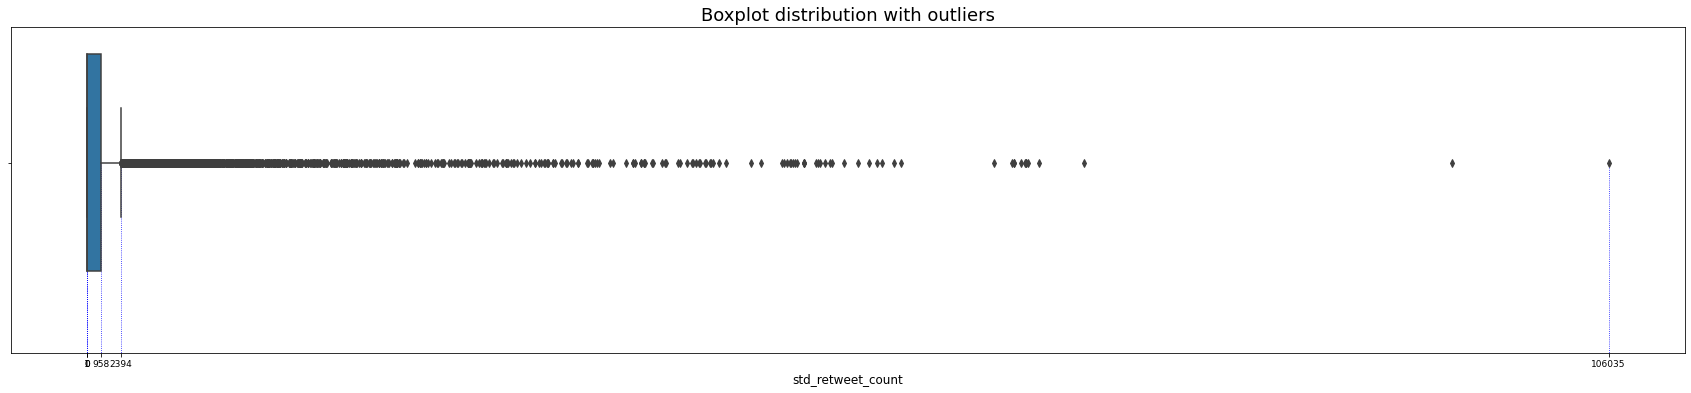

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='std_retweet_count', data=users)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(users.std_retweet_count, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("std_retweet_count", rotation = "horizontal", size = 12)
plt.show()

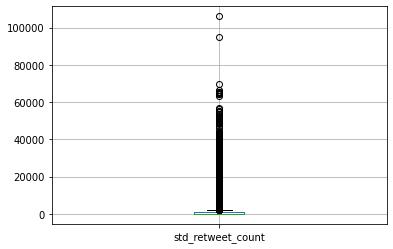

In [ ]:
users.boxplot(column=['std_retweet_count']) 

#### std_favorite_count

In [ ]:
users.std_favorite_count.isnull().sum()

0

Statistics section to analyze the attribute and its outliers.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.std_favorite_count.describe() 

count   11508.00
mean       16.15
std       124.19
min         0.00
25%         0.16
50%         0.26
75%         0.81
max      3722.30
Name: std_favorite_count, dtype: float64

In [ ]:
# Check the number of outliers
Q1, Q3= users.std_favorite_count.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in users.std_favorite_count:
  if x > max or x < min: 
    outliers = outliers+1

percentage = round((outliers*100)/users.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 1632
Percentage of outliers 14.18 %


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.std_favorite_count.describe() 

count   11508.00
mean       16.15
std       124.19
min         0.00
25%         0.16
50%         0.26
75%         0.81
max      3722.30
Name: std_favorite_count, dtype: float64

In [ ]:
median= np.nanmedian(users.std_favorite_count)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(users.std_favorite_count, nan_policy='omit'),2))
mode= stats.mode(users.std_favorite_count, nan_policy='omit')[0][0]
print("Mode:", mode)

Median: 0.26
MAD: 0.22
Mode: 0.0


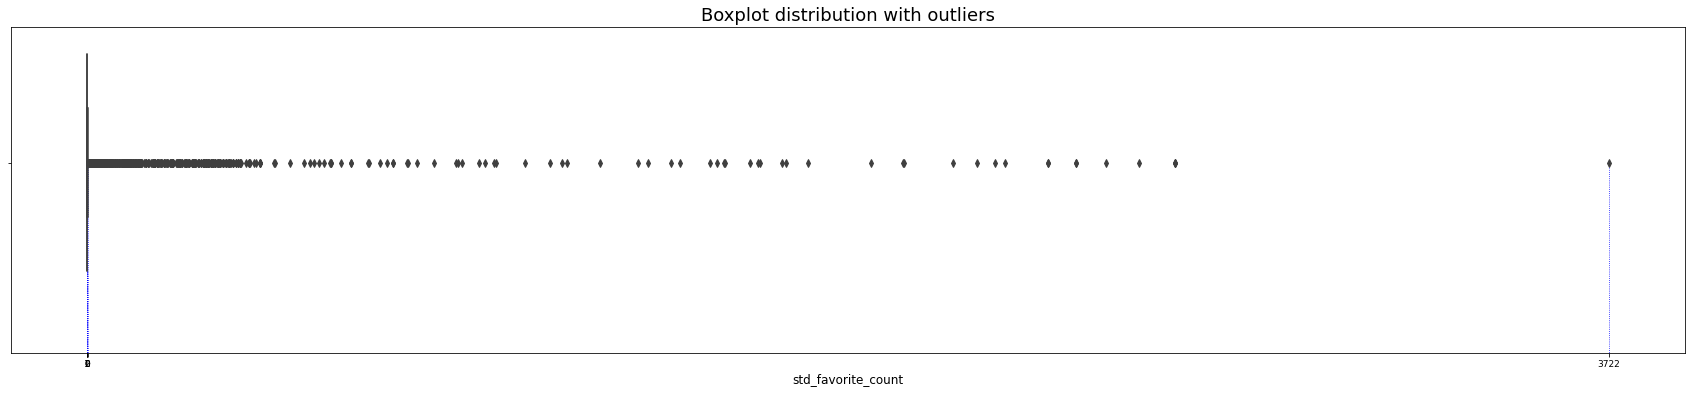

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='std_favorite_count', data=users)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(users.std_favorite_count, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("std_favorite_count", rotation = "horizontal", size = 12)
plt.show()

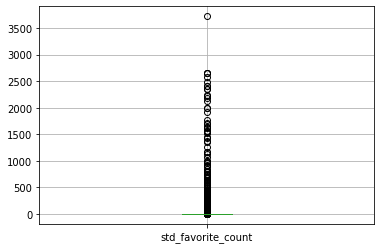

In [ ]:
users.boxplot(column=['std_favorite_count']) 

### Total activity per user

**Activity** is the measure of total productivity per user, based on the pre-existing indicator statuses_count, which is the total sum of all the tweets and retweets of every user. It consists of the statuses count with the addition of the replies made by the user, derived from the difference between the total count of tweets attributable to that user and the total value of statuses_count.
To simplify the explaining of the composition of the attributes:
* Statuses count = tweets + retweets
* Total activity = tweets + retweets + replies



In [ ]:
users['activity']=list(merge.groupby(['user_id']).size())
users

,user_id,name,lang,bot,user_created_at,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,activity
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,187157.00,0.00,1201.00,868.00,793.00,2643.00,21325.00,34.00,723.52,1.42,2374
1,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,11770,1158520.00,0.00,969.00,766.00,345.00,1357.00,296689.00,19.00,11508.21,1.08,2021
2,755116,呉⚛,en,0,2012-02-08 05:25:49,39158,92396.00,0.00,391.00,77.00,318.00,2113.00,13121.00,8.00,546.63,0.49,2144
3,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,18035,317861.00,0.00,209.00,488.00,848.00,1475.00,105138.00,7.00,3359.36,0.39,2017
4,785080,W H,en,0,2012-02-23 01:08:16,22496,138486.00,0.00,1714.00,185.00,234.00,2662.00,16181.00,32.00,462.74,1.17,3436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11503,3156622237,RoboDerp,en,0,2020-04-15 15:17:36,19061,7.00,0.00,85.00,372.00,1006.00,821.00,1.00,3.00,0.04,0.15,3717
11504,3158349782,OSU Ladder,en,0,2020-04-17 00:45:01,96,8860.00,0.00,161.00,21.00,1.00,77.00,6181.00,18.00,611.72,2.67,109
11505,3159993463,martin lee,en,0,2020-04-17 16:09:47,107,2458.00,0.00,9.00,22.00,47.00,34.00,976.00,1.00,103.17,0.26,127
11506,3161171948,丸董,zh-tw,0,2020-04-18 14:08:13,6,0.00,0.00,1.00,0.00,1.00,2.00,0.00,1.00,0.00,0.37,6


#### activity statistics

Statistics section to analyze the attribute and its outliers.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.activity.describe() 

count   11508.00
mean      979.99
std      1278.31
min         1.00
25%        68.00
50%       138.00
75%      1775.00
max      3929.00
Name: activity, dtype: float64

In [ ]:
# Check the number of outliers
Q1, Q3= users.activity.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in users.activity:
  if x > max or x < min: 
    outliers = outliers+1

percentage = round((outliers*100)/users.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 0
Percentage of outliers 0.0 %


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.activity.describe() 

count   11508.00
mean      979.99
std      1278.31
min         1.00
25%        68.00
50%       138.00
75%      1775.00
max      3929.00
Name: activity, dtype: float64

In [ ]:
median= np.nanmedian(users.activity)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(users.activity, nan_policy='omit'),2))
mode= stats.mode(users.activity, nan_policy='omit')[0][0]
print("Mode:", mode)

Median: 138.0
MAD: 117.0
Mode: 23


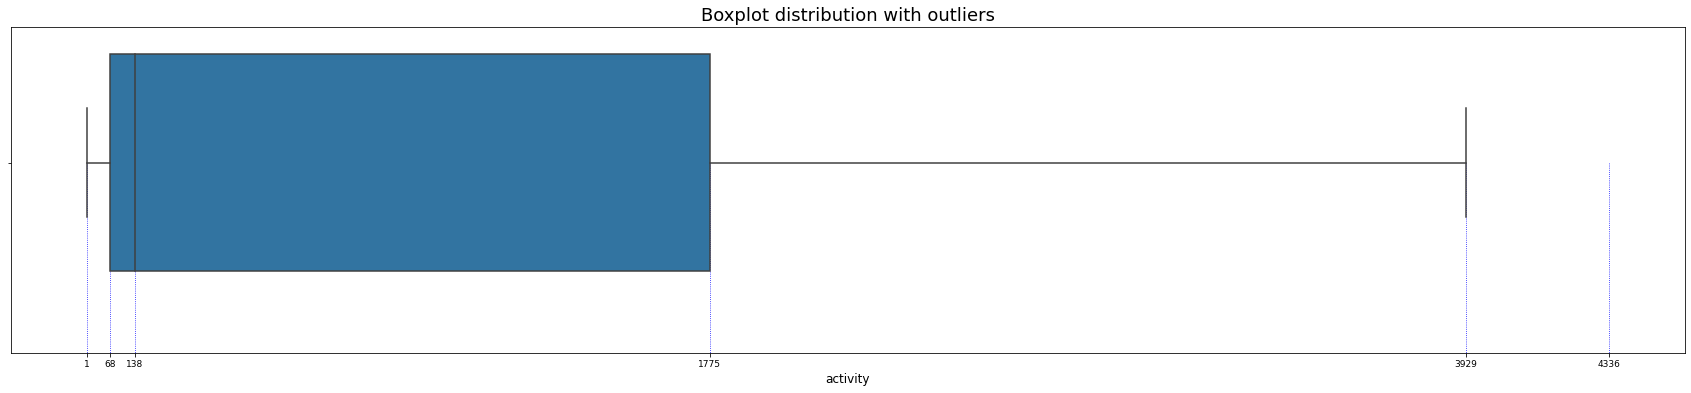

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='activity', data=users)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(users.activity, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("activity", rotation = "horizontal", size = 12)
plt.show()

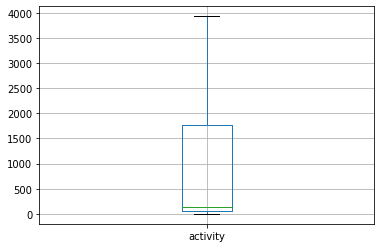

In [ ]:
users.boxplot(column=['activity']) 

### Popularity

**Popularity** is the ratio between the total number of favorited tweets, replies and retweets per user with its activity (as in the indicator Activity).
To simplify the explaining of the composition of the attribute:

* Popularity = (total of favorites, replies and retweets per user) / (Activity) 

In [ ]:
merge.groupby('user_id').sum()[['retweet_count', 'reply_count',	'favorite_count',	'num_hashtags',	'num_urls',	'num_mentions']]

,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
user_id,,,,,,
678033,187157.00,0.00,1201.00,868.00,793.00,2643.00
722623,1158520.00,0.00,969.00,766.00,345.00,1357.00
755116,92396.00,0.00,391.00,77.00,318.00,2113.00
755746,317861.00,0.00,209.00,488.00,848.00,1475.00
785080,138486.00,0.00,1714.00,185.00,234.00,2662.00
...,...,...,...,...,...,...
3156622237,7.00,0.00,85.00,372.00,1006.00,821.00
3158349782,8860.00,0.00,161.00,21.00,1.00,77.00
3159993463,2458.00,0.00,9.00,22.00,47.00,34.00


In [ ]:
popularity= (merge.groupby('user_id').sum()['retweet_count'] + merge.groupby('user_id').sum()['reply_count'] + merge.groupby('user_id').sum()['favorite_count'])
popularity= popularity/users['activity'].values

In [ ]:
users['popularity']=list(popularity)
users

,user_id,name,lang,bot,user_created_at,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,activity,popularity
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,187157.00,0.00,1201.00,868.00,793.00,2643.00,21325.00,34.00,723.52,1.42,2374,79.34
1,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,11770,1158520.00,0.00,969.00,766.00,345.00,1357.00,296689.00,19.00,11508.21,1.08,2021,573.72
2,755116,呉⚛,en,0,2012-02-08 05:25:49,39158,92396.00,0.00,391.00,77.00,318.00,2113.00,13121.00,8.00,546.63,0.49,2144,43.28
3,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,18035,317861.00,0.00,209.00,488.00,848.00,1475.00,105138.00,7.00,3359.36,0.39,2017,157.69
4,785080,W H,en,0,2012-02-23 01:08:16,22496,138486.00,0.00,1714.00,185.00,234.00,2662.00,16181.00,32.00,462.74,1.17,3436,40.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11503,3156622237,RoboDerp,en,0,2020-04-15 15:17:36,19061,7.00,0.00,85.00,372.00,1006.00,821.00,1.00,3.00,0.04,0.15,3717,0.02
11504,3158349782,OSU Ladder,en,0,2020-04-17 00:45:01,96,8860.00,0.00,161.00,21.00,1.00,77.00,6181.00,18.00,611.72,2.67,109,82.76
11505,3159993463,martin lee,en,0,2020-04-17 16:09:47,107,2458.00,0.00,9.00,22.00,47.00,34.00,976.00,1.00,103.17,0.26,127,19.43
11506,3161171948,丸董,zh-tw,0,2020-04-18 14:08:13,6,0.00,0.00,1.00,0.00,1.00,2.00,0.00,1.00,0.00,0.37,6,0.17


#### popularity statistics

Statistics section to analyze the attribute and its outliers.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.popularity.describe() 

count   11508.00
mean      333.09
std      2097.31
min         0.00
25%         0.07
50%         0.44
75%       119.72
max     69042.40
Name: popularity, dtype: float64

In [ ]:
# Check the number of outliers
Q1, Q3= users.popularity.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in users.popularity:
  if x > max or x < min: 
    outliers = outliers+1

percentage = round((outliers*100)/users.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 1872
Percentage of outliers 16.27 %


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.popularity.describe() 

count   11508.00
mean      333.09
std      2097.31
min         0.00
25%         0.07
50%         0.44
75%       119.72
max     69042.40
Name: popularity, dtype: float64

In [ ]:
median= np.nanmedian(users.popularity)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(users.popularity, nan_policy='omit'),2))
mode= stats.mode(users.popularity, nan_policy='omit')[0][0]
print("Mode:", mode)

Median: 0.44
MAD: 0.44
Mode: 0.0


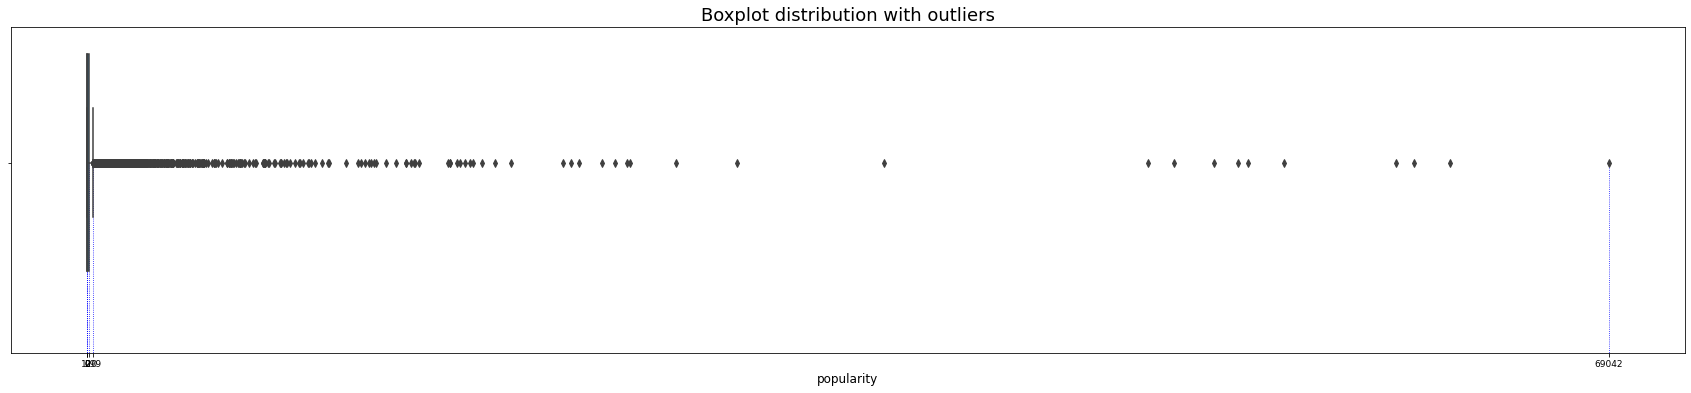

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='popularity', data=users)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(users.popularity, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("popularity", rotation = "horizontal", size = 12)
plt.show()

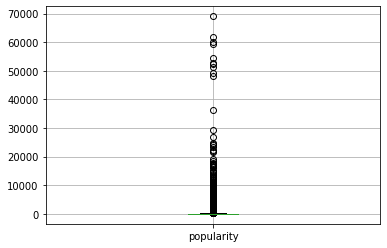

In [ ]:
users.boxplot(column=['popularity']) 

### Time (dates) indicators

#### Nightly user

**Nightly** is a binary **(0,1)** indicator to classify users according to their predisposition, whether one is more active at night or during the day. Thus, if a user is nocturnal he is assigned the value 1, otherwise 0.

In [ ]:
users['tweet_dates']= list(merge.groupby('user_id')['tweet_created_at'].agg(pd.Series.mode)) # dates of all tweets per user

In [ ]:
users['hours']=users['tweet_dates'].apply(lambda x: x.hour) #select only the hour of the tweets of every user

In [ ]:
users['nightly']=(users['hours']).apply(lambda x: 1 if np.mean(x)>20 or np.mean(x)<8 else 0) # set 1 if a user is nocturnal, 0 if not
users

,user_id,name,lang,bot,user_created_at,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,...,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,activity,popularity,tweet_dates,hours,nightly
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,187157.00,0.00,1201.00,868.00,...,2643.00,21325.00,34.00,723.52,1.42,2374,79.34,"[2020-02-25 03:01:28, 2020-02-25 03:28:16]","[3, 3]",1
1,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,11770,1158520.00,0.00,969.00,766.00,...,1357.00,296689.00,19.00,11508.21,1.08,2021,573.72,"[2019-01-03 03:03:11, 2019-01-03 03:04:43, 201...","[3, 3, 5, 7, 7, 11, 13, 14, 17, 18, 23, 14, 17...",0
2,755116,呉⚛,en,0,2012-02-08 05:25:49,39158,92396.00,0.00,391.00,77.00,...,2113.00,13121.00,8.00,546.63,0.49,2144,43.28,"[2020-01-03 03:13:47, 2020-01-03 03:14:08, 202...","[3, 3, 3, 3, 3, 3, 3, 7, 8, 8, 10, 10, 10, 10,...",1
3,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,18035,317861.00,0.00,209.00,488.00,...,1475.00,105138.00,7.00,3359.36,0.39,2017,157.69,"[2019-01-03 03:23:00, 2019-01-03 04:01:10, 201...","[3, 4, 16, 4, 13, 14, 22, 0, 4, 14, 14, 14, 19...",0
4,785080,W H,en,0,2012-02-23 01:08:16,22496,138486.00,0.00,1714.00,185.00,...,2662.00,16181.00,32.00,462.74,1.17,3436,40.80,"[2020-01-04 19:21:26, 2020-03-21 16:56:02]","[19, 16]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11503,3156622237,RoboDerp,en,0,2020-04-15 15:17:36,19061,7.00,0.00,85.00,372.00,...,821.00,1.00,3.00,0.04,0.15,3717,0.02,"[2020-04-30 17:51:20, 2020-04-30 18:01:51, 202...","[17, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 1...",0
11504,3158349782,OSU Ladder,en,0,2020-04-17 00:45:01,96,8860.00,0.00,161.00,21.00,...,77.00,6181.00,18.00,611.72,2.67,109,82.76,"[2020-04-17 03:18:00, 2020-04-17 05:48:19, 202...","[3, 5, 4, 6, 19, 19, 19, 19, 6, 20, 19, 19, 19]",0
11505,3159993463,martin lee,en,0,2020-04-17 16:09:47,107,2458.00,0.00,9.00,22.00,...,34.00,976.00,1.00,103.17,0.26,127,19.43,"[2020-04-19 12:49:25, 2020-04-21 01:36:29, 202...","[12, 1, 0, 6, 0, 7, 2, 13, 14, 16, 6, 10, 13, ...",0
11506,3161171948,丸董,zh-tw,0,2020-04-18 14:08:13,6,0.00,0.00,1.00,0.00,...,2.00,0.00,1.00,0.00,0.37,6,0.17,"[2020-04-18 14:13:38, 2020-04-21 12:03:19, 202...","[14, 12, 12, 13, 3, 5]",0


In [ ]:
users[:10]

,user_id,name,lang,bot,user_created_at,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,...,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,activity,popularity,tweet_dates,hours,nightly
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,187157.00,0.00,1201.00,868.00,...,2643.00,21325.00,34.00,723.52,1.42,2374,79.34,"[2020-02-25 03:01:28, 2020-02-25 03:28:16]","[3, 3]",1
1,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,11770,1158520.00,0.00,969.00,766.00,...,1357.00,296689.00,19.00,11508.21,1.08,2021,573.72,"[2019-01-03 03:03:11, 2019-01-03 03:04:43, 201...","[3, 3, 5, 7, 7, 11, 13, 14, 17, 18, 23, 14, 17...",0
2,755116,呉⚛,en,0,2012-02-08 05:25:49,39158,92396.00,0.00,391.00,77.00,...,2113.00,13121.00,8.00,546.63,0.49,2144,43.28,"[2020-01-03 03:13:47, 2020-01-03 03:14:08, 202...","[3, 3, 3, 3, 3, 3, 3, 7, 8, 8, 10, 10, 10, 10,...",1
3,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,18035,317861.00,0.00,209.00,488.00,...,1475.00,105138.00,7.00,3359.36,0.39,2017,157.69,"[2019-01-03 03:23:00, 2019-01-03 04:01:10, 201...","[3, 4, 16, 4, 13, 14, 22, 0, 4, 14, 14, 14, 19...",0
4,785080,W H,en,0,2012-02-23 01:08:16,22496,138486.00,0.00,1714.00,185.00,...,2662.00,16181.00,32.00,462.74,1.17,3436,40.80,"[2020-01-04 19:21:26, 2020-03-21 16:56:02]","[19, 16]",0
5,806585,Christopher Mahan,en,0,2012-03-03 17:27:49,29997,249009.00,0.00,1598.00,341.00,...,4636.00,22063.00,12.00,762.86,0.75,3843,65.21,"[2020-03-16 06:21:18, 2020-03-16 06:21:56, 202...","[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, ...",0
6,806975,Mrinal Desai,en,0,2012-03-03 20:00:04,28400,173785.00,0.00,529.00,643.00,...,2184.00,37791.00,13.00,1196.74,0.58,2628,66.33,"[2019-03-28 16:51:04, 2019-03-28 21:03:37, 201...","[16, 21, 21, 21, 21, 21, 21, 21, 0, 0, 0, 15, ...",0
7,887281,Paul Youlten,en,0,2012-03-11 22:25:08,626,9894.00,0.00,30.00,180.00,...,476.00,3849.00,4.00,206.83,0.27,652,15.22,"[2012-03-11 22:25:59, 2012-04-13 23:08:58, 201...","[22, 23, 23, 19, 17, 17, 10, 12, 12, 15, 15, 1...",0
8,1382561,jojoko,en,0,2012-03-18 23:24:35,8236,276333.00,0.00,612.00,630.00,...,2286.00,105138.00,11.00,2817.51,0.73,1951,141.95,"[2019-01-03 00:03:09, 2019-01-03 00:09:41, 201...","[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0
9,1813221,Morgan Johnson,en,0,2012-03-22 23:43:40,20225,702997.00,0.00,239.00,163.00,...,1401.00,72942.00,5.00,2372.23,0.50,1663,422.87,"[2020-01-03 08:37:18, 2020-01-03 08:48:30, 202...","[8, 8, 20, 20, 20, 20, 21, 21, 21, 4, 15, 15, ...",0


#### Most frequent year (tweets' publication)

The **most frequent year** retrieval is an indicator of the most prolific year of activity per user.

In [ ]:
users['years']=users['tweet_dates'].apply(lambda x: x.year) #select only the year of the tweets of every user

In [ ]:
users['most_freq_year']=(users['years']).apply(lambda x: stats.mode(x)[0][0]) 
users[:20]

,user_id,name,lang,bot,user_created_at,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,...,max_favorite_count,std_retweet_count,std_favorite_count,activity,popularity,tweet_dates,hours,nightly,years,most_freq_year
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,187157.00,0.00,1201.00,868.00,...,34.00,723.52,1.42,2374,79.34,"[2020-02-25 03:01:28, 2020-02-25 03:28:16]","[3, 3]",1,"[2020, 2020]",2020
1,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,11770,1158520.00,0.00,969.00,766.00,...,19.00,11508.21,1.08,2021,573.72,"[2019-01-03 03:03:11, 2019-01-03 03:04:43, 201...","[3, 3, 5, 7, 7, 11, 13, 14, 17, 18, 23, 14, 17...",0,"[2019, 2019, 2019, 2019, 2019, 2019, 2019, 201...",2019
2,755116,呉⚛,en,0,2012-02-08 05:25:49,39158,92396.00,0.00,391.00,77.00,...,8.00,546.63,0.49,2144,43.28,"[2020-01-03 03:13:47, 2020-01-03 03:14:08, 202...","[3, 3, 3, 3, 3, 3, 3, 7, 8, 8, 10, 10, 10, 10,...",1,"[2020, 2020, 2020, 2020, 2020, 2020, 2020, 202...",2020
3,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,18035,317861.00,0.00,209.00,488.00,...,7.00,3359.36,0.39,2017,157.69,"[2019-01-03 03:23:00, 2019-01-03 04:01:10, 201...","[3, 4, 16, 4, 13, 14, 22, 0, 4, 14, 14, 14, 19...",0,"[2019, 2019, 2019, 2019, 2019, 2019, 2019, 201...",2019
4,785080,W H,en,0,2012-02-23 01:08:16,22496,138486.00,0.00,1714.00,185.00,...,32.00,462.74,1.17,3436,40.80,"[2020-01-04 19:21:26, 2020-03-21 16:56:02]","[19, 16]",0,"[2020, 2020]",2020
5,806585,Christopher Mahan,en,0,2012-03-03 17:27:49,29997,249009.00,0.00,1598.00,341.00,...,12.00,762.86,0.75,3843,65.21,"[2020-03-16 06:21:18, 2020-03-16 06:21:56, 202...","[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, ...",0,"[2020, 2020, 2020, 2020, 2020, 2020, 2020, 202...",2020
6,806975,Mrinal Desai,en,0,2012-03-03 20:00:04,28400,173785.00,0.00,529.00,643.00,...,13.00,1196.74,0.58,2628,66.33,"[2019-03-28 16:51:04, 2019-03-28 21:03:37, 201...","[16, 21, 21, 21, 21, 21, 21, 21, 0, 0, 0, 15, ...",0,"[2019, 2019, 2019, 2019, 2019, 2019, 2019, 201...",2019
7,887281,Paul Youlten,en,0,2012-03-11 22:25:08,626,9894.00,0.00,30.00,180.00,...,4.00,206.83,0.27,652,15.22,"[2012-03-11 22:25:59, 2012-04-13 23:08:58, 201...","[22, 23, 23, 19, 17, 17, 10, 12, 12, 15, 15, 1...",0,"[2012, 2012, 2012, 2012, 2012, 2012, 2012, 201...",2014
8,1382561,jojoko,en,0,2012-03-18 23:24:35,8236,276333.00,0.00,612.00,630.00,...,11.00,2817.51,0.73,1951,141.95,"[2019-01-03 00:03:09, 2019-01-03 00:09:41, 201...","[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,"[2019, 2019, 2019, 2019, 2019, 2019, 2019, 201...",2019
9,1813221,Morgan Johnson,en,0,2012-03-22 23:43:40,20225,702997.00,0.00,239.00,163.00,...,5.00,2372.23,0.50,1663,422.87,"[2020-01-03 08:37:18, 2020-01-03 08:48:30, 202...","[8, 8, 20, 20, 20, 20, 21, 21, 21, 4, 15, 15, ...",0,"[2020, 2020, 2020, 2020, 2020, 2020, 2020, 202...",2020


#### Most frequent hour (tweets' publication)

The **most_freq_hour** retrieval is an indicator of the most prolific hour of the day of activity per user.

In [ ]:
users['most_freq_hour']=(users['hours']).apply(lambda x: stats.mode(x)[0][0]) 
users[:20]

,user_id,name,lang,bot,user_created_at,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,...,std_retweet_count,std_favorite_count,activity,popularity,tweet_dates,hours,nightly,years,most_freq_year,most_freq_hour
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,187157.00,0.00,1201.00,868.00,...,723.52,1.42,2374,79.34,"[2020-02-25 03:01:28, 2020-02-25 03:28:16]","[3, 3]",1,"[2020, 2020]",2020,3
1,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,11770,1158520.00,0.00,969.00,766.00,...,11508.21,1.08,2021,573.72,"[2019-01-03 03:03:11, 2019-01-03 03:04:43, 201...","[3, 3, 5, 7, 7, 11, 13, 14, 17, 18, 23, 14, 17...",0,"[2019, 2019, 2019, 2019, 2019, 2019, 2019, 201...",2019,22
2,755116,呉⚛,en,0,2012-02-08 05:25:49,39158,92396.00,0.00,391.00,77.00,...,546.63,0.49,2144,43.28,"[2020-01-03 03:13:47, 2020-01-03 03:14:08, 202...","[3, 3, 3, 3, 3, 3, 3, 7, 8, 8, 10, 10, 10, 10,...",1,"[2020, 2020, 2020, 2020, 2020, 2020, 2020, 202...",2020,1
3,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,18035,317861.00,0.00,209.00,488.00,...,3359.36,0.39,2017,157.69,"[2019-01-03 03:23:00, 2019-01-03 04:01:10, 201...","[3, 4, 16, 4, 13, 14, 22, 0, 4, 14, 14, 14, 19...",0,"[2019, 2019, 2019, 2019, 2019, 2019, 2019, 201...",2019,16
4,785080,W H,en,0,2012-02-23 01:08:16,22496,138486.00,0.00,1714.00,185.00,...,462.74,1.17,3436,40.80,"[2020-01-04 19:21:26, 2020-03-21 16:56:02]","[19, 16]",0,"[2020, 2020]",2020,16
5,806585,Christopher Mahan,en,0,2012-03-03 17:27:49,29997,249009.00,0.00,1598.00,341.00,...,762.86,0.75,3843,65.21,"[2020-03-16 06:21:18, 2020-03-16 06:21:56, 202...","[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, ...",0,"[2020, 2020, 2020, 2020, 2020, 2020, 2020, 202...",2020,2
6,806975,Mrinal Desai,en,0,2012-03-03 20:00:04,28400,173785.00,0.00,529.00,643.00,...,1196.74,0.58,2628,66.33,"[2019-03-28 16:51:04, 2019-03-28 21:03:37, 201...","[16, 21, 21, 21, 21, 21, 21, 21, 0, 0, 0, 15, ...",0,"[2019, 2019, 2019, 2019, 2019, 2019, 2019, 201...",2019,18
7,887281,Paul Youlten,en,0,2012-03-11 22:25:08,626,9894.00,0.00,30.00,180.00,...,206.83,0.27,652,15.22,"[2012-03-11 22:25:59, 2012-04-13 23:08:58, 201...","[22, 23, 23, 19, 17, 17, 10, 12, 12, 15, 15, 1...",0,"[2012, 2012, 2012, 2012, 2012, 2012, 2012, 201...",2014,22
8,1382561,jojoko,en,0,2012-03-18 23:24:35,8236,276333.00,0.00,612.00,630.00,...,2817.51,0.73,1951,141.95,"[2019-01-03 00:03:09, 2019-01-03 00:09:41, 201...","[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,"[2019, 2019, 2019, 2019, 2019, 2019, 2019, 201...",2019,3
9,1813221,Morgan Johnson,en,0,2012-03-22 23:43:40,20225,702997.00,0.00,239.00,163.00,...,2372.23,0.50,1663,422.87,"[2020-01-03 08:37:18, 2020-01-03 08:48:30, 202...","[8, 8, 20, 20, 20, 20, 21, 21, 21, 4, 15, 15, ...",0,"[2020, 2020, 2020, 2020, 2020, 2020, 2020, 202...",2020,16


In [ ]:
users.drop(['tweet_dates', 'hours', 'years'], axis=1, inplace=True)

### Tweets' richness

**Tweets' richnes** is an indicator of the presence of URLs, hashtags and mentions in the tweets of the dataset, calculated by the ratio between the sum of those elements and the size of the dataset, which corresponds to the number of total tweets available to us.
To simplify the explaining of the composition of the attribute:

* Richness = (#hashtags+#urls+#mentions)/#tweets 

In [ ]:
merge.groupby('user_id').sum()[['num_hashtags',	'num_urls',	'num_mentions']]

,num_hashtags,num_urls,num_mentions
user_id,,,
678033,868.00,793.00,2643.00
722623,766.00,345.00,1357.00
755116,77.00,318.00,2113.00
755746,488.00,848.00,1475.00
785080,185.00,234.00,2662.00
...,...,...,...
3156622237,372.00,1006.00,821.00
3158349782,21.00,1.00,77.00
3159993463,22.00,47.00,34.00


In [ ]:
richness = (merge.groupby('user_id').sum()['num_hashtags'] + merge.groupby('user_id').sum()['num_urls'] + merge.groupby('user_id').sum()['num_mentions'])/merge.groupby(['user_id']).size()
richness

user_id
678033       1.81
722623       1.22
755116       1.17
755746       1.39
785080       0.90
             ... 
3156622237   0.59
3158349782   0.91
3159993463   0.81
3161171948   0.50
3164941860   1.57
Length: 11508, dtype: float64

In [ ]:
users['tweet_richness']=list(richness)  
users

,user_id,name,lang,bot,user_created_at,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,...,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,activity,popularity,nightly,most_freq_year,most_freq_hour,tweet_richness
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,187157.00,0.00,1201.00,868.00,...,21325.00,34.00,723.52,1.42,2374,79.34,1,2020,3,1.81
1,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,11770,1158520.00,0.00,969.00,766.00,...,296689.00,19.00,11508.21,1.08,2021,573.72,0,2019,22,1.22
2,755116,呉⚛,en,0,2012-02-08 05:25:49,39158,92396.00,0.00,391.00,77.00,...,13121.00,8.00,546.63,0.49,2144,43.28,1,2020,1,1.17
3,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,18035,317861.00,0.00,209.00,488.00,...,105138.00,7.00,3359.36,0.39,2017,157.69,0,2019,16,1.39
4,785080,W H,en,0,2012-02-23 01:08:16,22496,138486.00,0.00,1714.00,185.00,...,16181.00,32.00,462.74,1.17,3436,40.80,0,2020,16,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11503,3156622237,RoboDerp,en,0,2020-04-15 15:17:36,19061,7.00,0.00,85.00,372.00,...,1.00,3.00,0.04,0.15,3717,0.02,0,2020,19,0.59
11504,3158349782,OSU Ladder,en,0,2020-04-17 00:45:01,96,8860.00,0.00,161.00,21.00,...,6181.00,18.00,611.72,2.67,109,82.76,0,2020,19,0.91
11505,3159993463,martin lee,en,0,2020-04-17 16:09:47,107,2458.00,0.00,9.00,22.00,...,976.00,1.00,103.17,0.26,127,19.43,0,2020,13,0.81
11506,3161171948,丸董,zh-tw,0,2020-04-18 14:08:13,6,0.00,0.00,1.00,0.00,...,0.00,1.00,0.00,0.37,6,0.17,0,2020,12,0.50


#### tweet_richness statistics

Statistics section to analyze the attribute and its outliers.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.tweet_richness.describe() 

count   11508.00
mean        0.66
std         1.15
min         0.00
25%         0.28
50%         0.42
75%         0.85
max        41.83
Name: tweet_richness, dtype: float64

In [ ]:
# Check the number of outliers
Q1, Q3= users.tweet_richness.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in users.tweet_richness:
  if x > max or x < min: 
    outliers = outliers+1

percentage = round((outliers*100)/users.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 380
Percentage of outliers 3.3 %


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.tweet_richness.describe() 

count   11508.00
mean        0.66
std         1.15
min         0.00
25%         0.28
50%         0.42
75%         0.85
max        41.83
Name: tweet_richness, dtype: float64

In [ ]:
median= np.nanmedian(users.tweet_richness)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(users.tweet_richness, nan_policy='omit'),2))
mode= stats.mode(users.tweet_richness, nan_policy='omit')[0][0]
print("Mode:", mode)

Median: 0.42
MAD: 0.24
Mode: 0.0


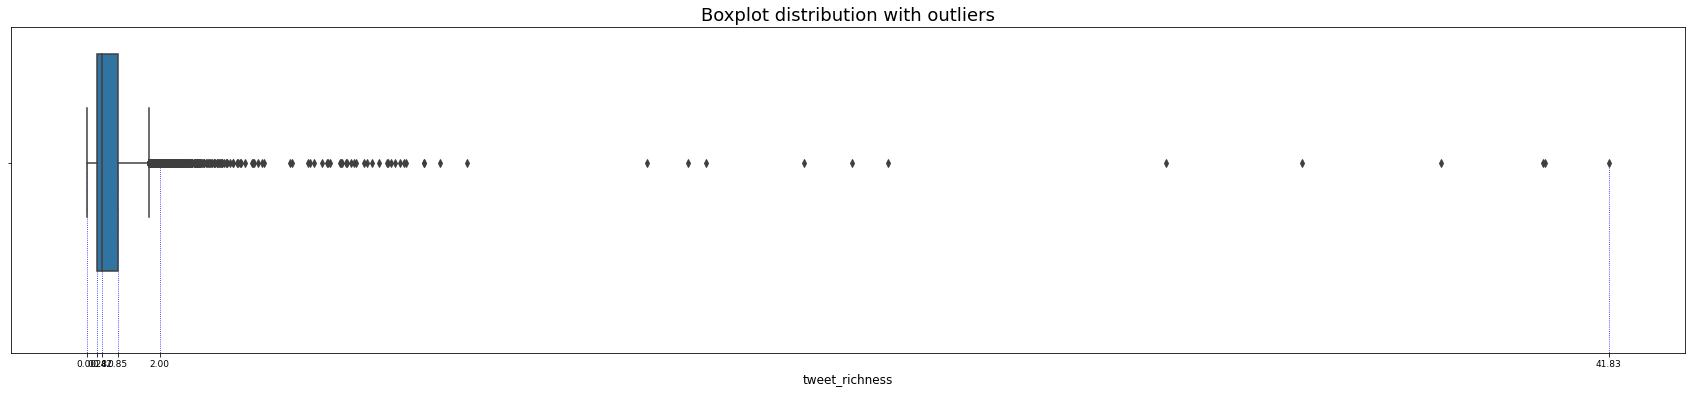

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='tweet_richness', data=users)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(users.tweet_richness, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("tweet_richness", rotation = "horizontal", size = 12)
plt.show()

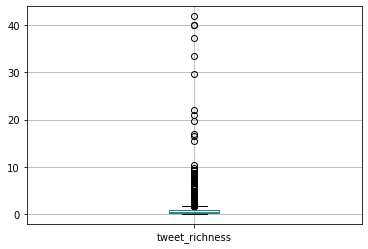

In [ ]:
users.boxplot(column=['tweet_richness']) 

### Tweets' entropy (per user)

In [ ]:
merge['len_text'] = merge['text'].str.len().values # texts length
merge['tweets_hours']=merge['tweet_created_at'].apply(lambda x: x.hour) #select only the hour of the tweets
merge

,user_id,name,lang,bot,user_created_at,statuses_count,id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,tweet_created_at,text,len_text,tweets_hours
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,2412,0.00,0.00,0.00,2.00,0.00,1.00,2020-02-28 21:41:17,@r0bl0rd did you arrange this? #llamas #winamp,46.00,21.00
1579,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,7687839,2.00,0.00,0.00,0.00,0.00,0.00,2020-01-15 20:00:07,"Little tip from this JD ""this is standard"" whe...",101.00,20.00
1580,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,7699169,0.00,0.00,1.00,0.00,0.00,1.00,2020-02-20 18:26:04,@VinodSreeharsha thanks Vinod!,30.00,18.00
1581,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,7700557,1.00,0.00,0.00,0.00,0.00,0.00,2020-02-18 02:13:23,Who was playing Kristin Wiig's mum in the Cali...,55.00,2.00
1582,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,7702891,1.00,0.00,0.00,0.00,1.00,1.00,NaT,RT @Damian_Barr: Cracking New Yorker piece on ...,104.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11277666,3164941860,Ariana Reweti,en,0,2020-04-21 07:28:31,133,3750571,0.00,0.00,0.00,0.00,0.00,0.00,2020-04-27 12:06:19,What even is sleep,19.00,12.00
11277667,3164941860,Ariana Reweti,en,0,2020-04-21 07:28:31,133,3828667,200.00,0.00,0.00,0.00,0.00,1.00,2020-04-28 22:13:35,RT @Dean_C_Chapman: Tommen... You dirty dawg...,47.00,22.00
11277668,3164941860,Ariana Reweti,en,0,2020-04-21 07:28:31,133,4179218,0.00,0.00,0.00,1.00,0.00,0.00,2020-04-26 06:00:25,Lets go see what all the fuss is about #Avenge...,59.00,6.00
11277651,3164941860,Ariana Reweti,en,0,2020-04-21 07:28:31,133,2676106,0.00,0.00,0.00,0.00,0.00,0.00,2020-04-24 21:27:15,Nothing like cramming for a test the night bef...,50.00,21.00


In [ ]:
entropy_text = [] #len_text entropy per user 
entropy_hours = [] #tweets_hours entropy per user
entropy_fav = [] #favorite_count entropy per user 
entropy_ret = [] #retweet_count entropy per user 
entropy_rep = [] #reply_count entropy per user     
entropy_has = [] #num_hashtags entropy per user 
entropy_url = [] #num_urls entropy per user 
entropy_men = [] #num_mentions entropy per user 

c = 0
for i in users.activity:  # in order to take list range

  texts_user = merge.len_text[c:i-1]
  hours_user = merge.tweets_hours[c:i-1]
  fav_user = merge.favorite_count[c:i-1]
  ret_user = merge.retweet_count[c:i-1]
  rep_user = merge.reply_count[c:i-1]
  has_user = merge.num_hashtags[c:i-1]
  url_user = merge.num_urls[c:i-1]
  men_user = merge.num_mentions[c:i-1]

  entropy_text.append(entropy(texts_user, base=2))
  entropy_hours.append(entropy(hours_user, base=2))
  entropy_fav.append(entropy(fav_user, base=2))
  entropy_ret.append(entropy(ret_user, base=2))
  entropy_rep.append(entropy(rep_user, base=2))
  entropy_has.append(entropy(has_user, base=2))
  entropy_url.append(entropy(url_user, base=2))
  entropy_men.append(entropy(men_user, base=2))

  c = i

/usr/local/lib/python3.8/dist-packages/scipy/stats/_entropy.py:72: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


In [ ]:
print(entropy_text[:5])
print(entropy_hours[:5])
print(entropy_fav[:5]) 
print(entropy_ret[:5]) 
print(entropy_rep[:5])  
print(entropy_has[:5]) 
print(entropy_url[:5]) 
print(entropy_men[:5]) 

[11.120054240122927, 0.0, 6.843950594270178, 0.0, 10.333883047025955]
[nan, 0.0, nan, 0.0, nan]
[8.831943498243104, 0.0, 3.9211165658478135, 0.0, 8.277789672492698]
[6.080425943634368, 0.0, 2.3755335557791373, 0.0, 2.354578431719271]
[nan, 0.0, nan, 0.0, nan]
[9.183814427734555, 0.0, 4.836433629007712, 0.0, 8.421512165892725]
[9.578213625691369, 0.0, 5.114369445886757, 0.0, 8.222892956625781]
[10.607494209809849, 0.0, 6.387526851390142, 0.0, 9.55648529421943]


In [ ]:
users['text_entropy'] = entropy_text
users['hour_entropy'] = entropy_hours
users['favcount_entropy'] = entropy_fav
users['retcount_entropy'] = entropy_ret
users['repcount_entropy'] = entropy_rep
users['has_entropy'] = entropy_has
users['url_entropy'] = entropy_url
users['men_entropy'] = entropy_men

In [ ]:
users['text_entropy'].fillna(0, inplace=True)
users['hour_entropy'].fillna(0, inplace=True)
users['favcount_entropy'].fillna(0, inplace=True)
users['retcount_entropy'].fillna(0, inplace=True)
users['repcount_entropy'].fillna(0, inplace=True)
users['has_entropy'].fillna(0, inplace=True)
users['url_entropy'].fillna(0, inplace=True)
users['men_entropy'].fillna(0, inplace=True)

In [ ]:
users

,user_id,name,lang,bot,user_created_at,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,...,most_freq_hour,tweet_richness,text_entropy,hour_entropy,favcount_entropy,retcount_entropy,repcount_entropy,has_entropy,url_entropy,men_entropy
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,187157.00,0.00,1201.00,868.00,...,3,1.81,11.12,0.00,8.83,6.08,0.00,9.18,9.58,10.61
1,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,11770,1158520.00,0.00,969.00,766.00,...,22,1.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,755116,呉⚛,en,0,2012-02-08 05:25:49,39158,92396.00,0.00,391.00,77.00,...,1,1.17,6.84,0.00,3.92,2.38,0.00,4.84,5.11,6.39
3,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,18035,317861.00,0.00,209.00,488.00,...,16,1.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,785080,W H,en,0,2012-02-23 01:08:16,22496,138486.00,0.00,1714.00,185.00,...,16,0.90,10.33,0.00,8.28,2.35,0.00,8.42,8.22,9.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11503,3156622237,RoboDerp,en,0,2020-04-15 15:17:36,19061,7.00,0.00,85.00,372.00,...,19,0.59,11.55,0.00,9.41,3.80,0.00,9.60,9.69,10.90
11504,3158349782,OSU Ladder,en,0,2020-04-17 00:45:01,96,8860.00,0.00,161.00,21.00,...,19,0.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
11505,3159993463,martin lee,en,0,2020-04-17 16:09:47,107,2458.00,0.00,9.00,22.00,...,13,0.81,3.96,0.00,1.00,1.33,0.00,0.00,2.81,3.50
11506,3161171948,丸董,zh-tw,0,2020-04-18 14:08:13,6,0.00,0.00,1.00,0.00,...,12,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#### text_entropy statistics

Statistics section to analyze the attribute and its outliers.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.text_entropy.describe() 

count   11508.00
mean        2.82
std         3.91
min         0.00
25%         0.00
50%         0.00
75%         4.57
max        11.82
Name: text_entropy, dtype: float64

In [ ]:
# Check the number of outliers
Q1, Q3= users.text_entropy.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in users.text_entropy:
  if x > max or x < min: 
    outliers = outliers+1

percentage = round((outliers*100)/users.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 621
Percentage of outliers 5.4 %


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.text_entropy.describe() 

count   11508.00
mean        2.82
std         3.91
min         0.00
25%         0.00
50%         0.00
75%         4.57
max        11.82
Name: text_entropy, dtype: float64

In [ ]:
median= np.nanmedian(users.text_entropy)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(users.text_entropy, nan_policy='omit'),2))
mode= stats.mode(users.text_entropy, nan_policy='omit')[0][0]
print("Mode:", mode)

Median: 0.0
MAD: 0.0
Mode: 0.0


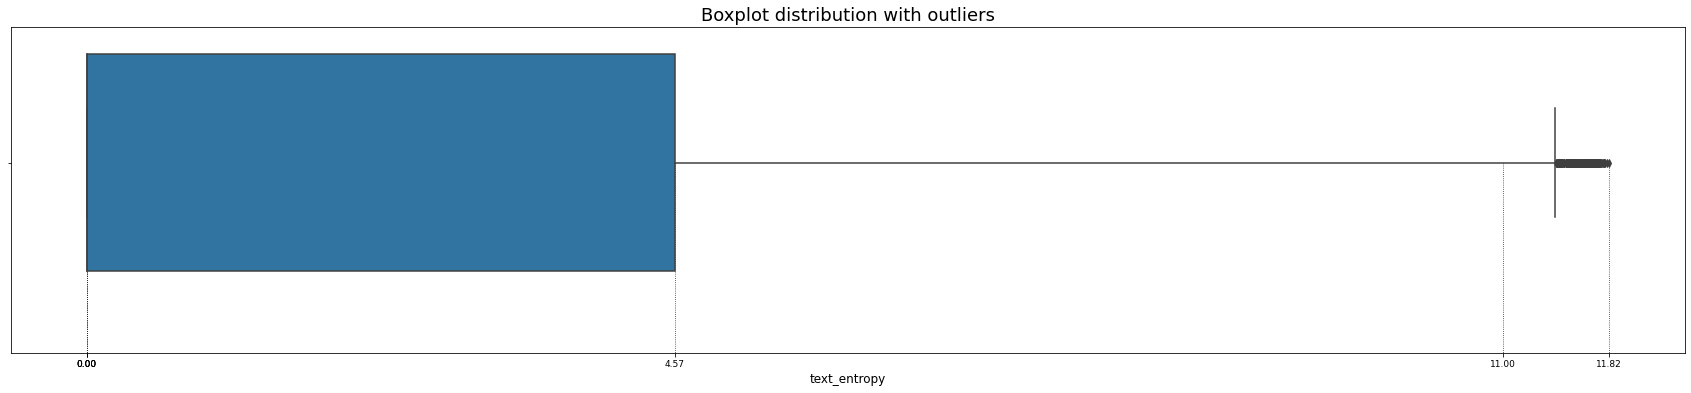

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='text_entropy', data=users)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(users.text_entropy, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("text_entropy", rotation = "horizontal", size = 12)
plt.show()

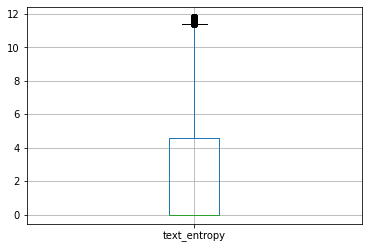

In [ ]:
users.boxplot(column=['text_entropy']) 

#### hour_entropy statistics

Statistics section to analyze the attribute and its outliers.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.hour_entropy.describe() 

count   11508.00
mean        0.06
std         0.34
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         3.53
Name: hour_entropy, dtype: float64

In [ ]:
# Check the number of outliers
Q1, Q3= users.hour_entropy.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in users.hour_entropy:
  if x > max or x < min: 
    outliers = outliers+1

percentage = round((outliers*100)/users.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 451
Percentage of outliers 3.92 %


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.hour_entropy.describe() 

count   11508.00
mean        0.06
std         0.34
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         3.53
Name: hour_entropy, dtype: float64

In [ ]:
median= np.nanmedian(users.hour_entropy)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(users.hour_entropy, nan_policy='omit'),2))
mode= stats.mode(users.hour_entropy, nan_policy='omit')[0][0]
print("Mode:", mode)

Median: 0.0
MAD: 0.0
Mode: 0.0


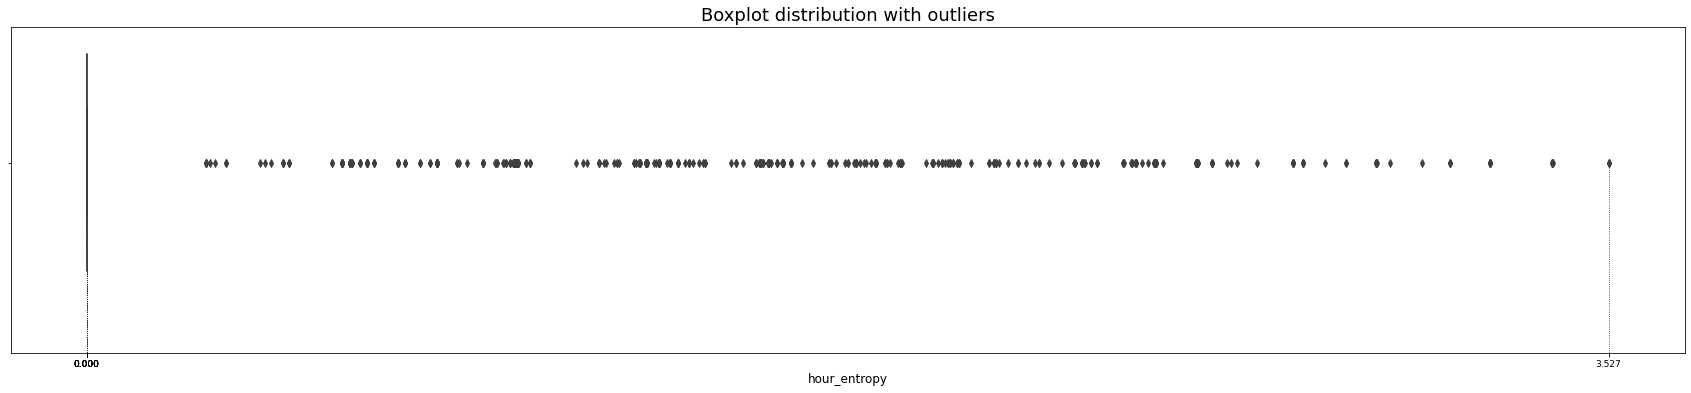

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='hour_entropy', data=users)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(users.hour_entropy, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("hour_entropy", rotation = "horizontal", size = 12)
plt.show()

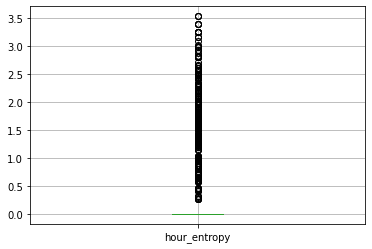

In [ ]:
users.boxplot(column=['hour_entropy']) 

#### favcount_entropy statistics

Statistics section to analyze the attribute and its outliers.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.favcount_entropy.describe() 

count   11508.00
mean        1.91
std         3.10
min         0.00
25%         0.00
50%         0.00
75%         2.52
max         9.69
Name: favcount_entropy, dtype: float64

In [ ]:
# Check the number of outliers
Q1, Q3= users.favcount_entropy.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in users.favcount_entropy:
  if x > max or x < min: 
    outliers = outliers+1

percentage = round((outliers*100)/users.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 1875
Percentage of outliers 16.29 %


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.favcount_entropy.describe() 

count   11508.00
mean        1.91
std         3.10
min         0.00
25%         0.00
50%         0.00
75%         2.52
max         9.69
Name: favcount_entropy, dtype: float64

In [ ]:
median= np.nanmedian(users.favcount_entropy)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(users.favcount_entropy, nan_policy='omit'),2))
mode= stats.mode(users.favcount_entropy, nan_policy='omit')[0][0]
print("Mode:", mode)

Median: 0.0
MAD: 0.0
Mode: 0.0


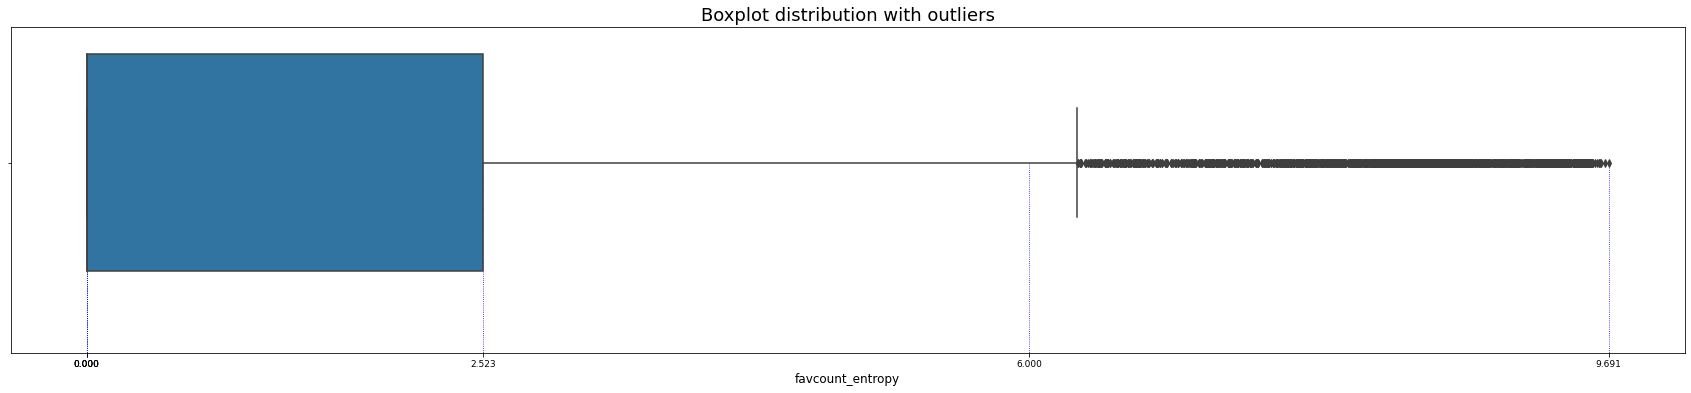

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='favcount_entropy', data=users)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(users.favcount_entropy, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("favcount_entropy", rotation = "horizontal", size = 12)
plt.show()

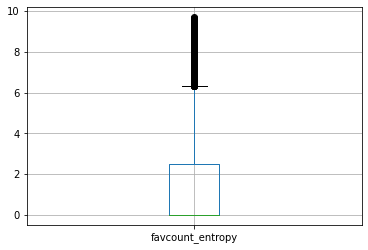

In [ ]:
users.boxplot(column=['favcount_entropy']) 

#### retcount_entropy statistics

Statistics section to analyze the attribute and its outliers.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.retcount_entropy.describe() 

count   11508.00
mean        1.07
std         1.71
min         0.00
25%         0.00
50%         0.00
75%         1.69
max         6.37
Name: retcount_entropy, dtype: float64

In [ ]:
# Check the number of outliers
Q1, Q3= users.retcount_entropy.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in users.retcount_entropy:
  if x > max or x < min: 
    outliers = outliers+1

percentage = round((outliers*100)/users.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 1149
Percentage of outliers 9.98 %


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.retcount_entropy.describe() 

count   11508.00
mean        1.07
std         1.71
min         0.00
25%         0.00
50%         0.00
75%         1.69
max         6.37
Name: retcount_entropy, dtype: float64

In [ ]:
median= np.nanmedian(users.retcount_entropy)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(users.retcount_entropy, nan_policy='omit'),2))
mode= stats.mode(users.retcount_entropy, nan_policy='omit')[0][0]
print("Mode:", mode)

Median: 0.0
MAD: 0.0
Mode: 0.0


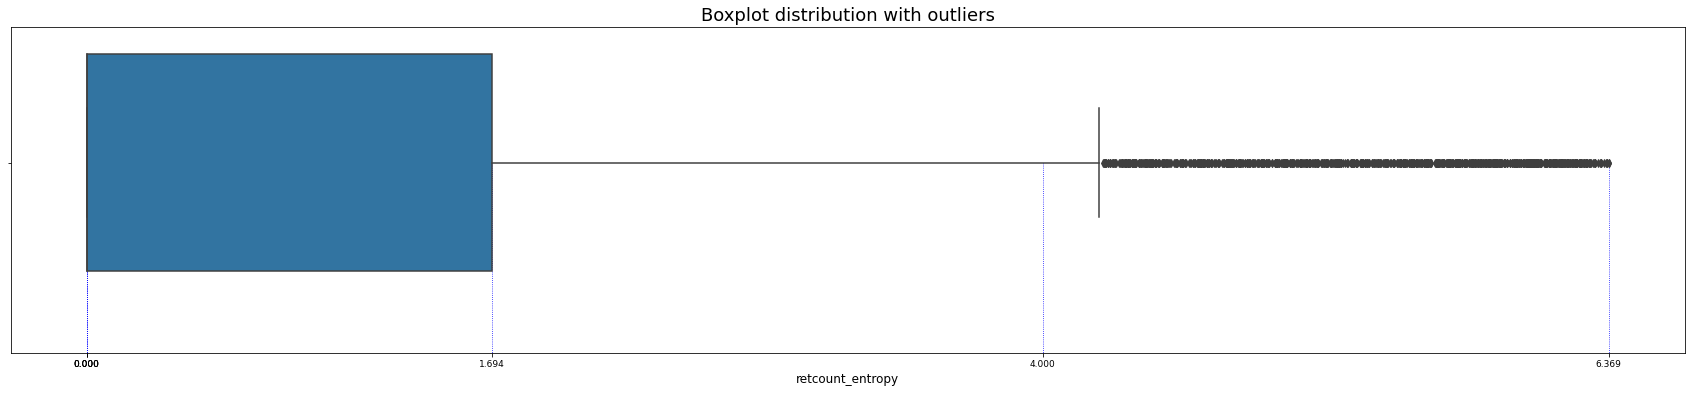

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='retcount_entropy', data=users)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(users.retcount_entropy, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("retcount_entropy", rotation = "horizontal", size = 12)
plt.show()

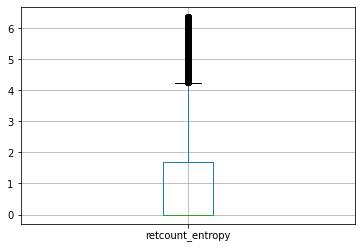

In [ ]:
users.boxplot(column=['retcount_entropy']) 

#### repcount_entropy statistics

Statistics section to analyze the attribute and its outliers.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.repcount_entropy.describe() 

count   11508.00
mean        0.00
std         0.00
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         0.00
Name: repcount_entropy, dtype: float64

In [ ]:
# Check the number of outliers
Q1, Q3= users.repcount_entropy.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in users.repcount_entropy:
  if x > max or x < min: 
    outliers = outliers+1

percentage = round((outliers*100)/users.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 0
Percentage of outliers 0.0 %


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.repcount_entropy.describe() 

count   11508.00
mean        0.00
std         0.00
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         0.00
Name: repcount_entropy, dtype: float64

In [ ]:
median= np.nanmedian(users.repcount_entropy)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(users.repcount_entropy, nan_policy='omit'),2))
mode= stats.mode(users.repcount_entropy, nan_policy='omit')[0][0]
print("Mode:", mode)

Median: 0.0
MAD: 0.0
Mode: 0.0


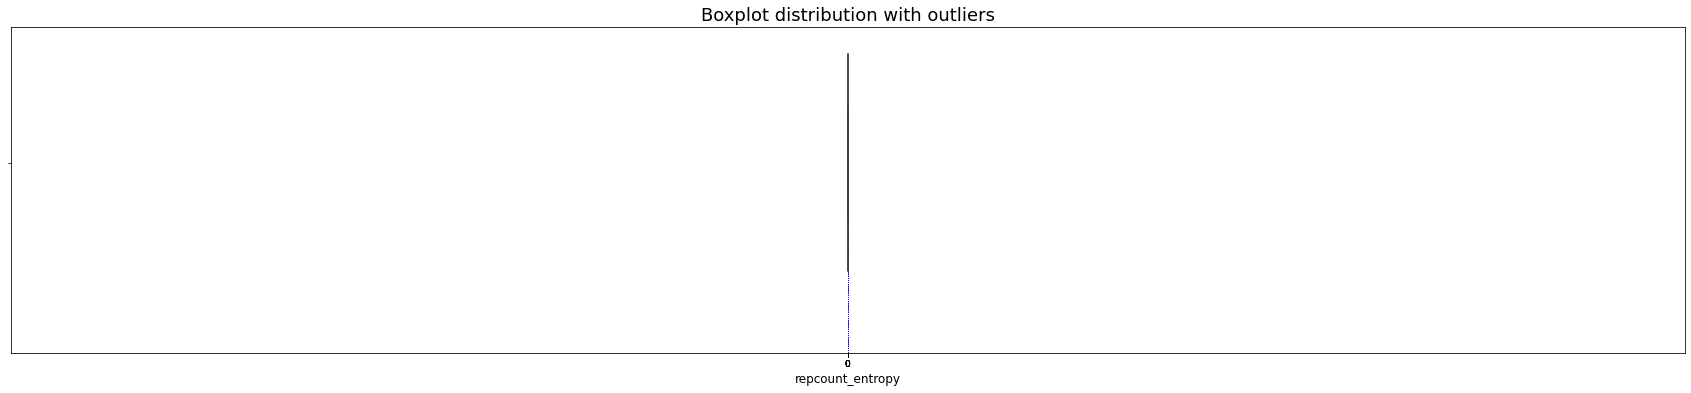

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='repcount_entropy', data=users)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(users.repcount_entropy, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("repcount_entropy", rotation = "horizontal", size = 12)
plt.show()

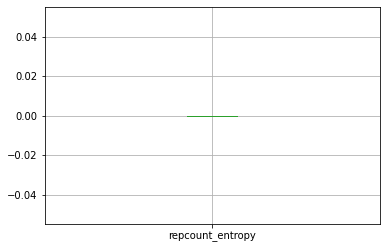

In [ ]:
users.boxplot(column=['repcount_entropy']) 

#### has_entropy statistics

Statistics section to analyze the attribute and its outliers.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.has_entropy.describe() 

count   11508.00
mean        1.99
std         3.19
min         0.00
25%         0.00
50%         0.00
75%         2.95
max         9.90
Name: has_entropy, dtype: float64

In [ ]:
# Check the number of outliers
Q1, Q3= users.has_entropy.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in users.has_entropy:
  if x > max or x < min: 
    outliers = outliers+1

percentage = round((outliers*100)/users.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 1710
Percentage of outliers 14.86 %


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.has_entropy.describe() 

count   11508.00
mean        1.99
std         3.19
min         0.00
25%         0.00
50%         0.00
75%         2.95
max         9.90
Name: has_entropy, dtype: float64

In [ ]:
median= np.nanmedian(users.has_entropy)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(users.has_entropy, nan_policy='omit'),2))
mode= stats.mode(users.has_entropy, nan_policy='omit')[0][0]
print("Mode:", mode)

Median: 0.0
MAD: 0.0
Mode: 0.0


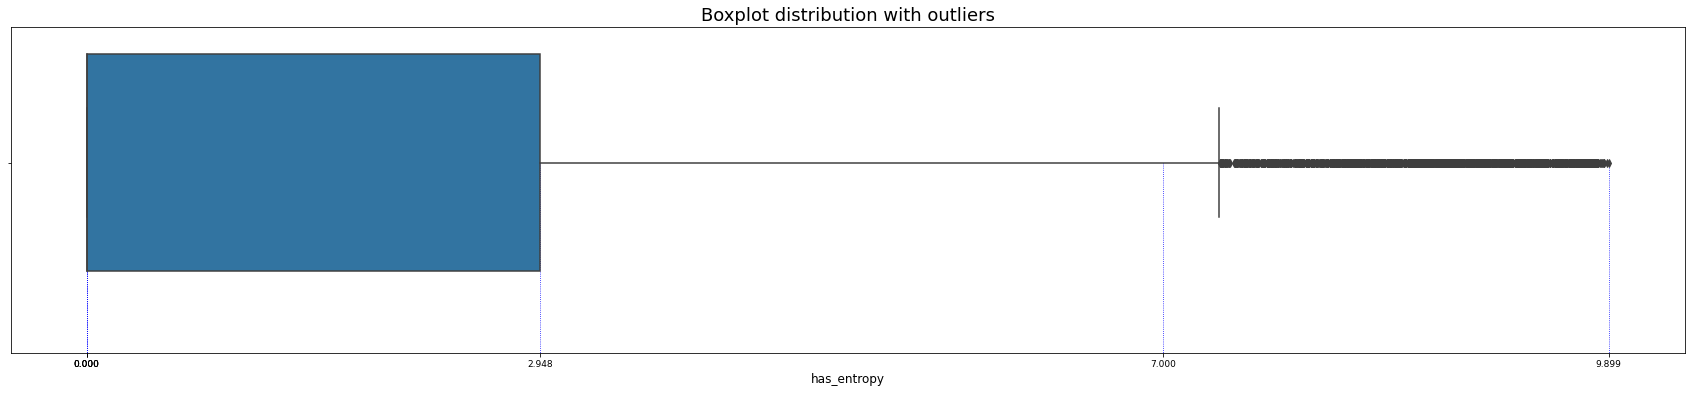

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='has_entropy', data=users)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(users.has_entropy, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("has_entropy", rotation = "horizontal", size = 12)
plt.show()

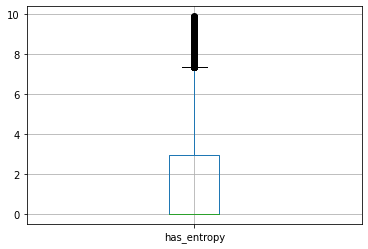

In [ ]:
users.boxplot(column=['has_entropy']) 

#### url_entropy statistics

Statistics section to analyze the attribute and its outliers.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.url_entropy.describe() 

count   11508.00
mean        2.03
std         3.25
min         0.00
25%         0.00
50%         0.00
75%         2.81
max        10.00
Name: url_entropy, dtype: float64

In [ ]:
# Check the number of outliers
Q1, Q3= users.url_entropy.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in users.url_entropy:
  if x > max or x < min: 
    outliers = outliers+1

percentage = round((outliers*100)/users.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 1742
Percentage of outliers 15.14 %


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.url_entropy.describe() 

count   11508.00
mean        2.03
std         3.25
min         0.00
25%         0.00
50%         0.00
75%         2.81
max        10.00
Name: url_entropy, dtype: float64

In [ ]:
median= np.nanmedian(users.url_entropy)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(users.url_entropy, nan_policy='omit'),2))
mode= stats.mode(users.url_entropy, nan_policy='omit')[0][0]
print("Mode:", mode)

Median: 0.0
MAD: 0.0
Mode: 0.0


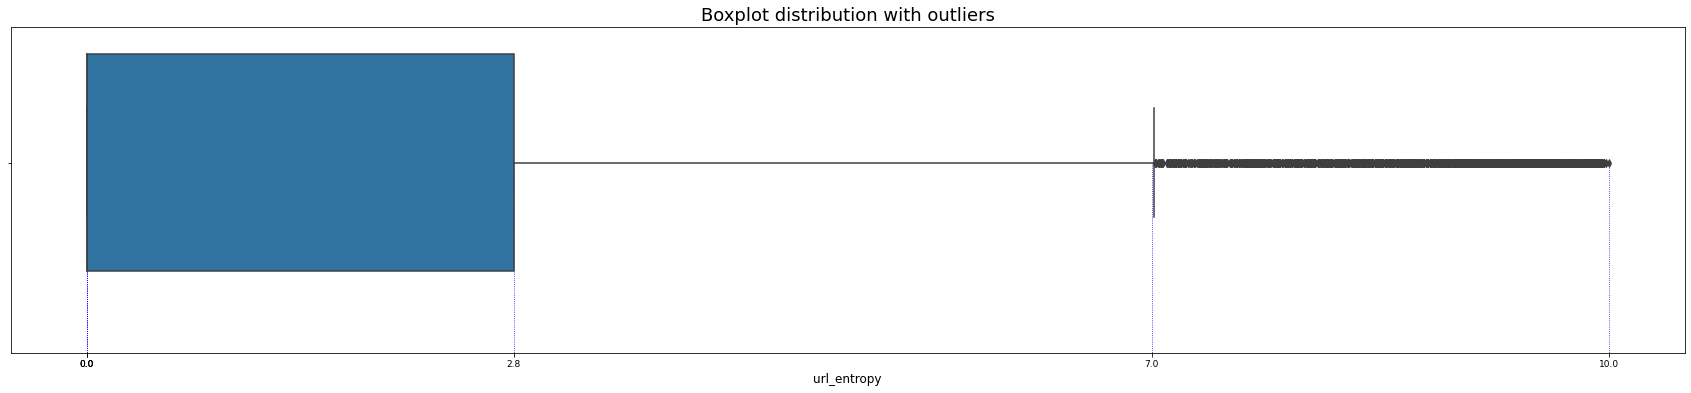

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='url_entropy', data=users)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(users.url_entropy, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("url_entropy", rotation = "horizontal", size = 12)
plt.show()

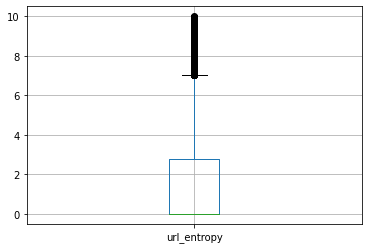

In [ ]:
users.boxplot(column=['url_entropy']) 

#### men_entropy statistics

Statistics section to analyze the attribute and its outliers.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.men_entropy.describe() 

count   11508.00
mean        2.57
std         3.67
min         0.00
25%         0.00
50%         0.00
75%         4.04
max        11.17
Name: men_entropy, dtype: float64

In [ ]:
# Check the number of outliers
Q1, Q3= users.men_entropy.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in users.men_entropy:
  if x > max or x < min: 
    outliers = outliers+1

percentage = round((outliers*100)/users.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 934
Percentage of outliers 8.12 %


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.men_entropy.describe() 

count   11508.00
mean        2.57
std         3.67
min         0.00
25%         0.00
50%         0.00
75%         4.04
max        11.17
Name: men_entropy, dtype: float64

In [ ]:
median= np.nanmedian(users.men_entropy)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(users.men_entropy, nan_policy='omit'),2))
mode= stats.mode(users.men_entropy, nan_policy='omit')[0][0]
print("Mode:", mode)

Median: 0.0
MAD: 0.0
Mode: 0.0


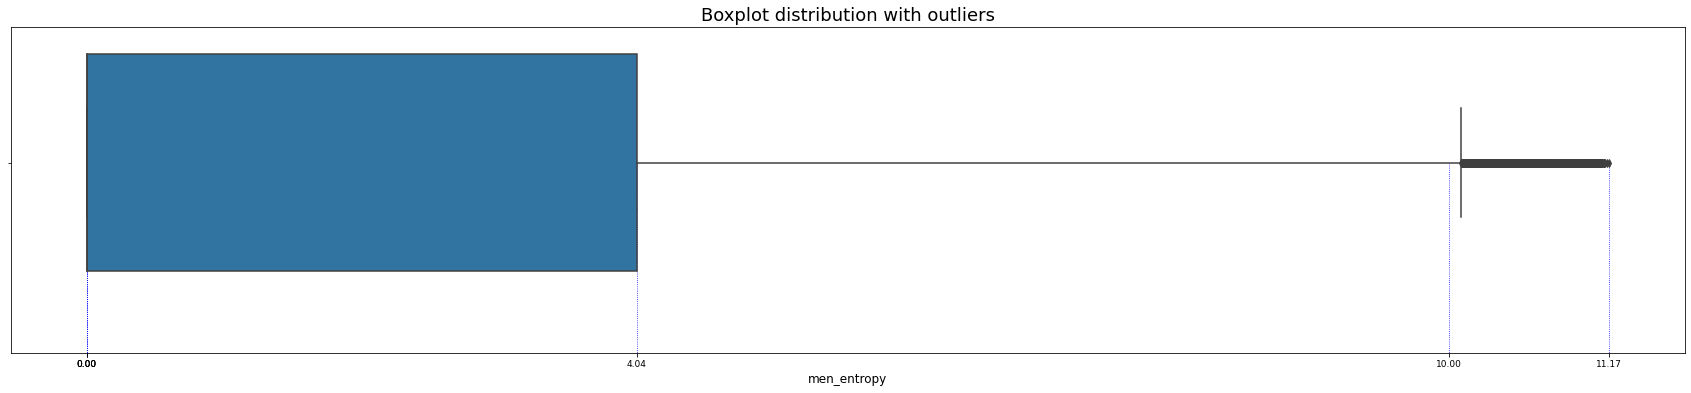

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='men_entropy', data=users)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(users.men_entropy, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("men_entropy", rotation = "horizontal", size = 12)
plt.show()

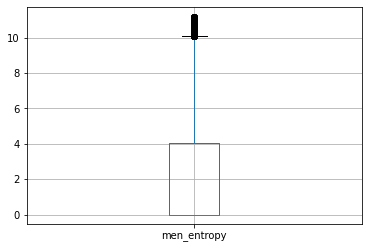

In [ ]:
users.boxplot(column=['men_entropy']) 

### Average length of the tweets per user

In [ ]:
avgtext = merge.text.str.len().groupby(merge.user_id).mean()

In [ ]:
users['avg_textlen']=list(avgtext)  
users

,user_id,name,lang,bot,user_created_at,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,...,tweet_richness,text_entropy,hour_entropy,favcount_entropy,retcount_entropy,repcount_entropy,has_entropy,url_entropy,men_entropy,avg_textlen
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,187157.00,0.00,1201.00,868.00,...,1.81,11.12,0.00,8.83,6.08,0.00,9.18,9.58,10.61,109.64
1,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,11770,1158520.00,0.00,969.00,766.00,...,1.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,85.03
2,755116,呉⚛,en,0,2012-02-08 05:25:49,39158,92396.00,0.00,391.00,77.00,...,1.17,6.84,0.00,3.92,2.38,0.00,4.84,5.11,6.39,80.78
3,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,18035,317861.00,0.00,209.00,488.00,...,1.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,84.28
4,785080,W H,en,0,2012-02-23 01:08:16,22496,138486.00,0.00,1714.00,185.00,...,0.90,10.33,0.00,8.28,2.35,0.00,8.42,8.22,9.56,95.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11503,3156622237,RoboDerp,en,0,2020-04-15 15:17:36,19061,7.00,0.00,85.00,372.00,...,0.59,11.55,0.00,9.41,3.80,0.00,9.60,9.69,10.90,46.49
11504,3158349782,OSU Ladder,en,0,2020-04-17 00:45:01,96,8860.00,0.00,161.00,21.00,...,0.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,84.59
11505,3159993463,martin lee,en,0,2020-04-17 16:09:47,107,2458.00,0.00,9.00,22.00,...,0.81,3.96,0.00,1.00,1.33,0.00,0.00,2.81,3.50,82.08
11506,3161171948,丸董,zh-tw,0,2020-04-18 14:08:13,6,0.00,0.00,1.00,0.00,...,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,26.67


#### avg_textlen statistics

Statistics section to analyze the attribute and its outliers.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.avg_textlen.describe() 

count   11508.00
mean       70.30
std        16.60
min         3.00
25%        61.37
50%        67.60
75%        79.77
max       245.00
Name: avg_textlen, dtype: float64

In [ ]:
# Check the number of outliers
Q1, Q3= users.avg_textlen.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in users.avg_textlen:
  if x > max or x < min: 
    outliers = outliers+1

percentage = round((outliers*100)/users.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 413
Percentage of outliers 3.59 %


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.avg_textlen.describe() 

count   11508.00
mean       70.30
std        16.60
min         3.00
25%        61.37
50%        67.60
75%        79.77
max       245.00
Name: avg_textlen, dtype: float64

In [ ]:
median= np.nanmedian(users.avg_textlen)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(users.avg_textlen, nan_policy='omit'),2))
mode= stats.mode(users.avg_textlen, nan_policy='omit')[0][0]
print("Mode:", mode)

Median: 67.6
MAD: 7.68
Mode: 60.0


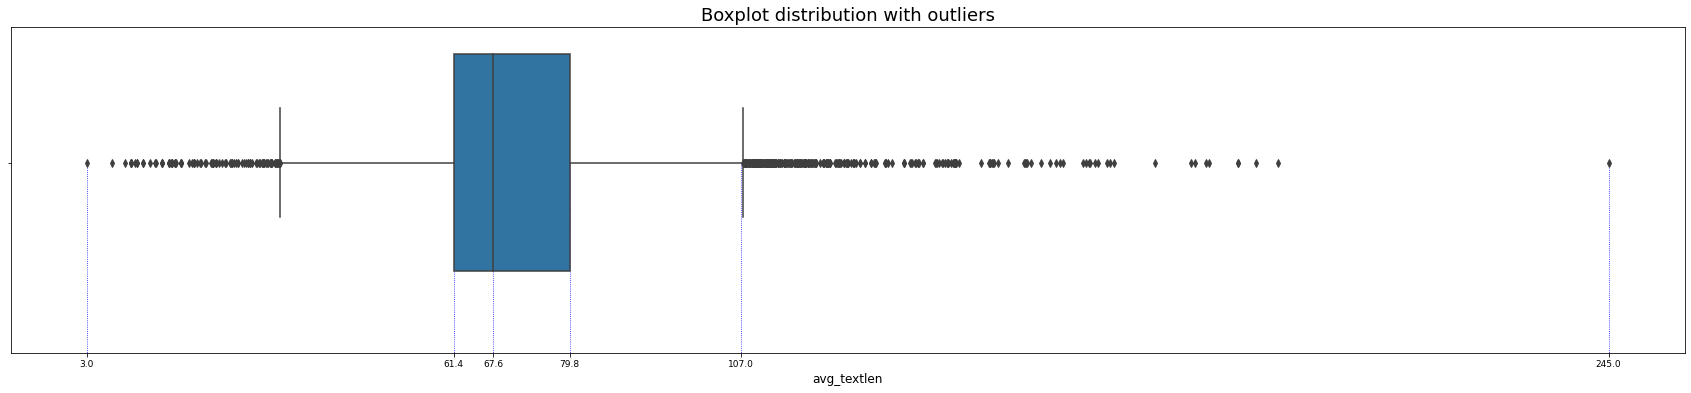

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='avg_textlen', data=users)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(users.avg_textlen, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("avg_textlen", rotation = "horizontal", size = 12)
plt.show()

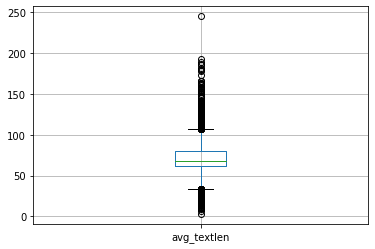

In [ ]:
users.boxplot(column=['avg_textlen']) 

### Activity richness and days on Twitter

Ratio between the total activity (number of tweets,retweets and replies) and the time spent on twitter. The higher the value, the richer the user activity.

In [ ]:
#since when every user is registered on twitter (for how much time has the account been on twitter?)
dt_string = "2022-09-28 00:00:00" 
format = "%Y-%m-%d %H:%M:%S"
laterdate = datetime.datetime.strptime(dt_string, format)
dates = users.user_created_at.apply(lambda x: (laterdate.date() - (datetime.datetime.strptime(x, format)).date()).days) 
users['days_on_tw'] = list(dates)
users['days_on_tw'] 

0        3900
1        3893
2        3885
3        3884
4        3870
         ... 
11503     896
11504     894
11505     894
11506     893
11507     890
Name: days_on_tw, Length: 11508, dtype: int64

In [ ]:
users['activity_richness'] = users['activity']/users['days_on_tw']

In [ ]:
users

,user_id,name,lang,bot,user_created_at,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,...,hour_entropy,favcount_entropy,retcount_entropy,repcount_entropy,has_entropy,url_entropy,men_entropy,avg_textlen,days_on_tw,activity_richness
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,187157.00,0.00,1201.00,868.00,...,0.00,8.83,6.08,0.00,9.18,9.58,10.61,109.64,3900,0.61
1,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,11770,1158520.00,0.00,969.00,766.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,85.03,3893,0.52
2,755116,呉⚛,en,0,2012-02-08 05:25:49,39158,92396.00,0.00,391.00,77.00,...,0.00,3.92,2.38,0.00,4.84,5.11,6.39,80.78,3885,0.55
3,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,18035,317861.00,0.00,209.00,488.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,84.28,3884,0.52
4,785080,W H,en,0,2012-02-23 01:08:16,22496,138486.00,0.00,1714.00,185.00,...,0.00,8.28,2.35,0.00,8.42,8.22,9.56,95.17,3870,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11503,3156622237,RoboDerp,en,0,2020-04-15 15:17:36,19061,7.00,0.00,85.00,372.00,...,0.00,9.41,3.80,0.00,9.60,9.69,10.90,46.49,896,4.15
11504,3158349782,OSU Ladder,en,0,2020-04-17 00:45:01,96,8860.00,0.00,161.00,21.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,84.59,894,0.12
11505,3159993463,martin lee,en,0,2020-04-17 16:09:47,107,2458.00,0.00,9.00,22.00,...,0.00,1.00,1.33,0.00,0.00,2.81,3.50,82.08,894,0.14
11506,3161171948,丸董,zh-tw,0,2020-04-18 14:08:13,6,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,26.67,893,0.01


#### days_on_tw statistics

Statistics section to analyze the attribute and its outliers.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.days_on_tw.describe() 

count   11508.00
mean     1820.61
std       552.45
min       890.00
25%      1311.00
50%      1702.00
75%      2079.00
max      3900.00
Name: days_on_tw, dtype: float64

In [ ]:
# Check the number of outliers
Q1, Q3= users.days_on_tw.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in users.days_on_tw:
  if x > max or x < min: 
    outliers = outliers+1

percentage = round((outliers*100)/users.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 128
Percentage of outliers 1.11 %


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.days_on_tw.describe() 

count   11508.00
mean     1820.61
std       552.45
min       890.00
25%      1311.00
50%      1702.00
75%      2079.00
max      3900.00
Name: days_on_tw, dtype: float64

In [ ]:
median= np.nanmedian(users.days_on_tw)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(users.days_on_tw, nan_policy='omit'),2))
mode= stats.mode(users.days_on_tw, nan_policy='omit')[0][0]
print("Mode:", mode)

Median: 1702.0
MAD: 389.0
Mode: 1686


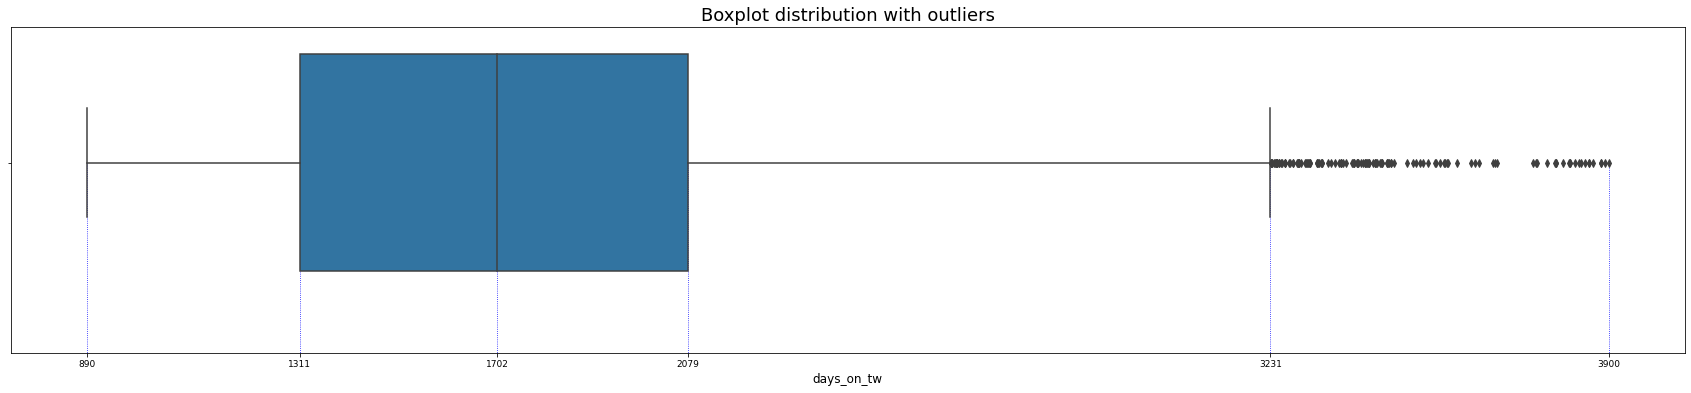

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='days_on_tw', data=users)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(users.days_on_tw, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("days_on_tw", rotation = "horizontal", size = 12)
plt.show()

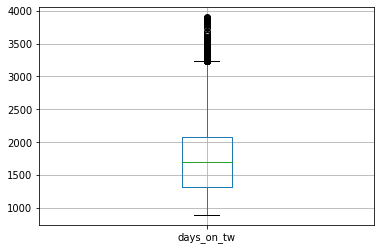

In [ ]:
users.boxplot(column=['days_on_tw']) 

#### activity_richness statistics

Statistics section to analyze the attribute and its outliers.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.activity_richness.describe() 

count   11508.00
mean        0.51
std         0.70
min         0.00
25%         0.03
50%         0.10
75%         0.80
max         4.15
Name: activity_richness, dtype: float64

In [ ]:
# Check the number of outliers
Q1, Q3= users.activity_richness.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in users.activity_richness:
  if x > max or x < min: 
    outliers = outliers+1

percentage = round((outliers*100)/users.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 463
Percentage of outliers 4.02 %


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.activity_richness.describe() 

count   11508.00
mean        0.51
std         0.70
min         0.00
25%         0.03
50%         0.10
75%         0.80
max         4.15
Name: activity_richness, dtype: float64

In [ ]:
median= np.nanmedian(users.activity_richness)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(users.activity_richness, nan_policy='omit'),2))
mode= stats.mode(users.activity_richness, nan_policy='omit')[0][0]
print("Mode:", mode)

Median: 0.1
MAD: 0.09
Mode: 0.012455516014234875


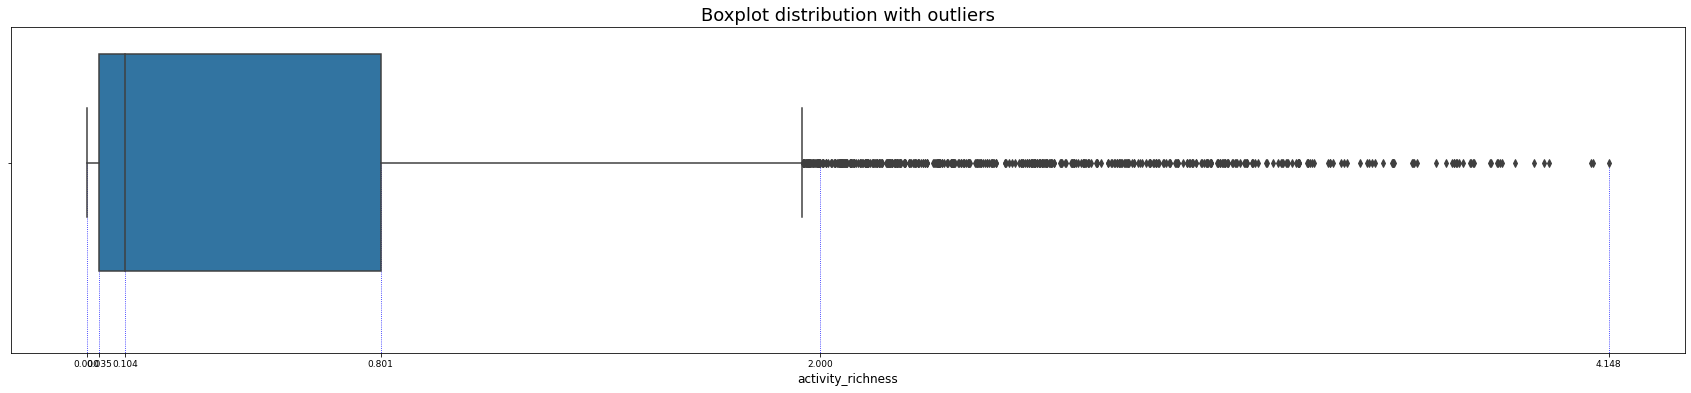

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='activity_richness', data=users)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(users.activity_richness, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("activity_richness", rotation = "horizontal", size = 12)
plt.show()

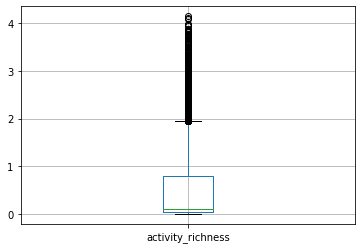

In [ ]:
users.boxplot(column=['activity_richness']) 

### Shannon entropy of the attributes

In [ ]:
#from sklearn.feature_selection import mutual_info_regression
#from sklearn import preprocessing

#X = np.array(users['days_on_tw'])
#X = np.reshape(X, (-1,1))
#y = np.array(users['activity'])

#mi_score = sklearn.feature_selection.mutual_info_regression(X, y, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)
#print('Mutual Information of the indicators activity and days_on_tw:', float(mi_score))

In [ ]:
print(entropy(users.statuses_count, base=2), ' statuses_count column entropy')   
print(entropy(users.retweet_count, base=2), ' retweet_count column entropy') 
print(entropy(users.reply_count, base=2), ' reply_count column entropy') 
print(entropy(users.favorite_count, base=2), ' favorite_count column entropy') 
print(entropy(users.num_hashtags, base=2), ' num_hashtags column entropy') 
print(entropy(users.num_urls, base=2), ' num_urls column entropy') 
print(entropy(users.num_mentions, base=2), ' num_mentions column entropy') 
print(entropy(users.activity, base=2), ' activity column entropy') 
print(entropy(users.popularity, base=2), ' popularity column entropy') 
print(entropy(users.most_freq_year, base=2), ' most_freq_year column entropy') 
print(entropy(users.most_freq_hour, base=2), ' most_freq_hour column entropy') 
print(entropy(users.tweet_richness, base=2), ' tweet_richness column entropy') 
print(entropy(users.text_entropy, base=2), ' text_entropy column entropy') 
print(entropy(users.hour_entropy, base=2), ' hour_entropy column entropy') 
print(entropy(users.favcount_entropy, base=2), ' favcount_entropy column entropy') 
print(entropy(users.retcount_entropy, base=2), ' retcount_entropy column entropy') 
print(entropy(users.repcount_entropy, base=2), ' repcount_entropy column entropy') 
print(entropy(users.has_entropy, base=2), ' has_entropy column entropy') 
print(entropy(users.url_entropy, base=2), ' url_entropy column entropy') 
print(entropy(users.men_entropy, base=2), ' men_entropy column entropy') 
print(entropy(users.avg_textlen, base=2), ' avg_textlen column entropy') 
print(entropy(users.days_on_tw, base=2), ' days_on_tw column entropy') 
print(entropy(users.activity_richness, base=2), ' activity_richness column entropy') 

10.905323150576478  statuses_count column entropy
9.722752136080677  retweet_count column entropy
8.310537859757124  reply_count column entropy
8.451876395876498  favorite_count column entropy
11.313382035667976  num_hashtags column entropy
11.156590219683784  num_urls column entropy
11.596111391922006  num_mentions column entropy
12.331644006978138  activity column entropy
9.934951439118016  popularity column entropy
13.490349299564457  most_freq_year column entropy
13.05445709841159  most_freq_hour column entropy
12.776490024837909  tweet_richness column entropy
12.097822702152683  text_entropy column entropy
8.650491741707805  hour_entropy column entropy
11.791936910089216  favcount_entropy column entropy
11.854821136231196  retcount_entropy column entropy
nan  repcount_entropy column entropy
11.801648618155983  has_entropy column entropy
11.820059440728176  url_entropy column entropy
12.043721876013025  men_entropy column entropy
13.451357332079711  avg_textlen column entropy
13.42

/usr/local/lib/python3.8/dist-packages/scipy/stats/_entropy.py:72: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


### Saving Users Profile Dataset

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             11508 non-null  int64  
 1   name                11507 non-null  object 
 2   lang                11508 non-null  object 
 3   bot                 11508 non-null  int64  
 4   user_created_at     11508 non-null  object 
 5   statuses_count      11508 non-null  int64  
 6   retweet_count       11508 non-null  float64
 7   reply_count         11508 non-null  float64
 8   favorite_count      11508 non-null  float64
 9   num_hashtags        11508 non-null  float64
 10  num_urls            11508 non-null  float64
 11  num_mentions        11508 non-null  float64
 12  max_retweet_count   11508 non-null  float64
 13  max_favorite_count  11508 non-null  float64
 14  std_retweet_count   11508 non-null  float64
 15  std_favorite_count  11508 non-null  float64
 16  acti

In [ ]:
users.to_csv('/content/drive/Shareddrives/DataMining/dataset/users_profile.csv', index=False)

In [ ]:
users_profile = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/users_profile.csv', lineterminator='\n')

### Correlations

In [ ]:
users_profile_num = users_profile[['statuses_count', 'retweet_count', 'reply_count', 'favorite_count', 'num_hashtags', 'num_urls', 'num_mentions', 'max_retweet_count', 'max_favorite_count', 'std_retweet_count', 'std_favorite_count', 'activity', 'popularity', 'tweet_richness', 'text_entropy', 'hour_entropy', 'favcount_entropy', 'retcount_entropy', 'repcount_entropy', 'has_entropy', 'url_entropy', 'men_entropy', 'avg_textlen', 'days_on_tw', 'activity_richness']]

In [ ]:
plt.figure(figsize = (20,6),dpi=500)
sns.heatmap(users_profile_num.corr(), annot=True)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

high correlation check:

In [ ]:
for i in range(0, len(users_profile_num.columns)):
    for j in range(i+1, len(users_profile_num.columns)):
        corr = users_profile_num[users_profile_num.columns[i]].corr(users_profile_num[users_profile_num.columns[j]])
        if  corr > 0.8:
            print(users_profile_num.columns[i] + " - " + users_profile_num.columns[j] + "\t" + '{:.2f}'.format(corr))

activity - activity_richness	0.93
text_entropy - favcount_entropy	0.98
text_entropy - retcount_entropy	0.92
text_entropy - has_entropy	0.98
text_entropy - url_entropy	0.98
text_entropy - men_entropy	1.00
favcount_entropy - retcount_entropy	0.91
favcount_entropy - has_entropy	0.99
favcount_entropy - url_entropy	0.99
favcount_entropy - men_entropy	0.98
retcount_entropy - has_entropy	0.91
retcount_entropy - url_entropy	0.93
retcount_entropy - men_entropy	0.93
has_entropy - url_entropy	0.99
has_entropy - men_entropy	0.98
url_entropy - men_entropy	0.99


removed attributes:

*   reply_count --> 0
*   repcount_entropy --> 0
*   hour_entropy --> 0
*   activity
*   favcount_entropy	
*   retcount_entropy	
*   has_entropy	
*   url_entropy	
*   men_entropy	



In [ ]:
users_profile_num = users_profile[['statuses_count', 'retweet_count', 'favorite_count', 'num_hashtags', 'num_urls', 'num_mentions',  'max_retweet_count', 'max_favorite_count', 'std_retweet_count', 'std_favorite_count', 'popularity', 'tweet_richness', 'text_entropy', 'avg_textlen', 'days_on_tw', 'activity_richness']]

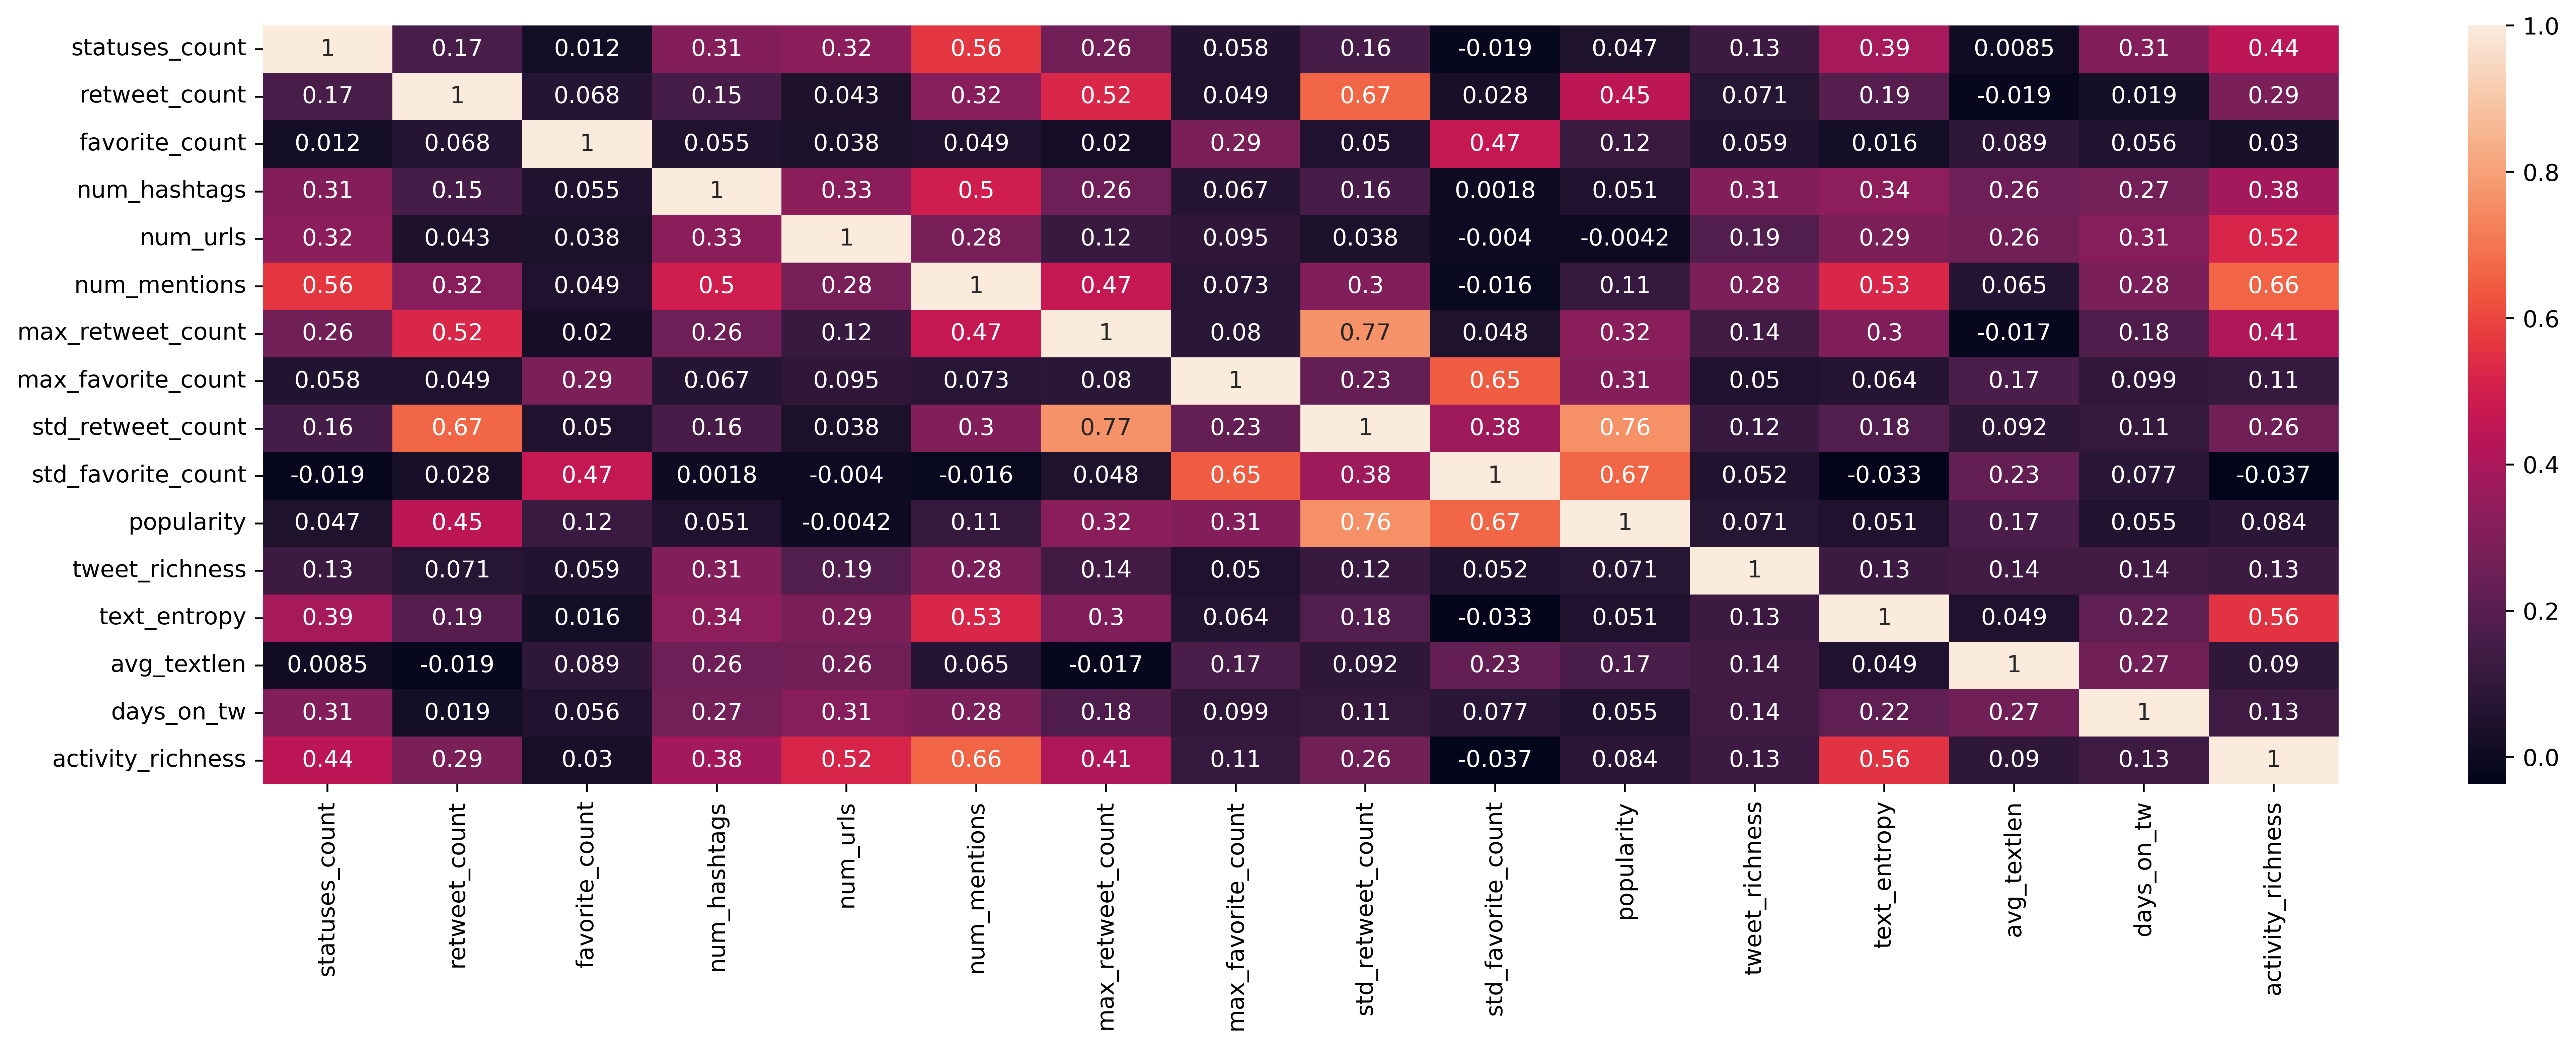

In [ ]:
plt.figure(figsize = (20,6), dpi=500)
sns.heatmap(users_profile_num.corr(), annot=True)
plt.show()

In [ ]:
users_profile_num.to_csv('/content/drive/Shareddrives/DataMining/dataset/users_profile_clustering.csv', index=False)

<Figure size 7500x7500 with 0 Axes>

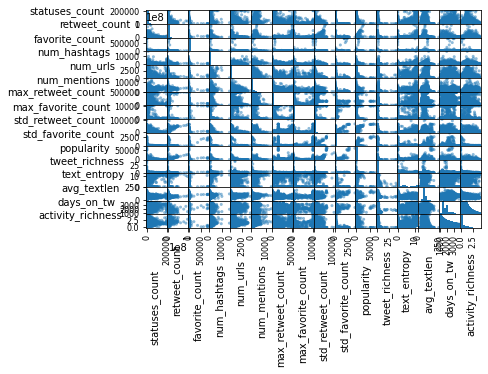

In [ ]:
plt.figure(figsize=(15, 15), dpi=500)
axes = pd.plotting.scatter_matrix(users_profile_num)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()